*21/Agosto/2025*

*Ángela Valentina Bustos Giraldo* , *Mariana Montoya Torres*

<h1>RAYOS X</h1>

<h4> Objetivos </h4>


<p> El objetivo del experimento es analizar el comportamiento de los rayos X y verificar sus propiedades. Se verificó experimentalmente la ley de desplazamiento de Duane–Hunt para determinar la longitud de onda mínima y calcular la constante de Planck h. Además, se midió la atenuación de los rayos X al atravesar placas metálicas para obtener los coeficientes de absorción de cada material, se calculó el cambio de longitud de onda debido al efecto Compton y se analizó cómo varía la intensidad del espectro característico en función del voltaje y la corriente del ánodo. 
</p>

<h4> Montaje </h4> 


<p> Para cumplir los objetivos de este experimentoss se utilizó unidad de rayos X 35kV (Phywe) con un Goniómetro de
rayos X (3, cuadrado morado) se encuentra la fuente de rayos X (cuadrado azul), El objetivo (la parte en la que esta el cristal, cuadrado rojo) y el contador Geiger-Muller (cuadrado verde).Tubo de rayos X de cobre y un computador del que podemos recuperar los datos. El cristal analizador, ya sea de LiF o KBr, cumple la función de dispersar los rayos X según la ley de Bragg de modo que se puedan observar los picos característicos de emisión. Para dirigir adecuadamente el haz incidente se colocan diafragmas de distintos diámetros (1 mm para LiF y 2 mm para KBr) los cuales limitan la apertura del haz y mejoran la resolución espectral.

El tubo contador dispuesto en el extremo del goniómetro se encarga de registrar la radiación difractada por el cristal. Sus señales eléctricas se envían a la unidad básica de rayos X donde son contabilizadas y procesadas.

La unidad de control concentra los ajustes necesarios para la adquisición de los espectros. Entre sus funciones se encuentran: el modo de acoplamiento automático, la selección de tiempos de compuerta, los pasos angulares (0.1° en este caso) y el rango de escaneo (3°–55° para LiF y 3°–75° para KBr). Asimismo, desde esta unidad se regula el alto voltaje aplicado al ánodo del tubo (35 kV) y la corriente de operación (1 mA).

Finalmente, el sistema puede acoplarse a un registrador XY o a un PC mediante la conexión SUB-D, de modo que las señales analógicas correspondientes al número de cuentas y a la posición angular se representen en tiempo real facilitando la construcción del espectro de rayos X característicos de cobre.  </p>

<p align="center">
  <img src="montaje.jpg" alt="Mi imagen" width="600">
</p>


<h4>Datos de Calibración:</h4>

<p>Se utilizó un crital de LiF con una distancia (d) intermolecular de <b>201 pm</b> para el primer y segundo día de toma de datos.  </p>

<p>Respecto a los ángulos para la máxima intensidad se obtuvieron dos distintos para los dos días de toma de datos. En el primer día se obtuvo máxima intensidad en un ángulo de <b>20,9°</b> con una diferencia de 1,7° del valor esperado dado por la guía y para el segundo día se obtuvo máxima intensidad en un ángulo de <b>20,8°</b> con una diferencia de 1,8° del valor esperado. </p>

In [197]:
#Librerías
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.special import wofz
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.constants import h, c, e
from matplotlib.gridspec import GridSpec
from scipy import stats



<h4> Procesamiento de toma de datos obtenidos de el PYWHE </h4>

In [28]:
def leer_columnas(path_archivo):
    columnas = []

    with open(Path(path_archivo), "r", encoding="latin-1", errors="ignore") as f:
        for linea in f:
            partes = linea.strip().replace(",", ".").split()
            try:
                fila = [float(x) for x in partes]
                
                if not columnas:
                    columnas = [[] for _ in range(len(fila))]
           
                for i, val in enumerate(fila):
                    columnas[i].append(val)
            except ValueError:
                
                continue

    return columnas


<h3>Actividad 1:</h3>
<p>1. Gráficar intensidad contra longitud de onda utilizando la ley de Bragg descrita con la ecuación 2dsinθ = nλ. Realice un ajuste para todos los picos, compare entre un ajuste a una Lorentziana dada por la ecuación y un perfil Voigt.</p>


<p>Para el ajuste Lorentziano se utilizó la siguiente ecuación </p>

$$
I(\lambda) = y_{0} + \frac{A}{\pi} \cdot \frac{\gamma}{(\lambda - \lambda_{0})^{2} + \gamma^{2}}
$$
- $I(\lambda) $: intensidad  
- $y_{0}$: línea base  
- $A $: área del pico  
- $ \lambda_{0} $: posición central  
- $ \gamma $: semianchura a mitad de altura (HWHM)


<p>Para el perfil Voigt se utilizó la siguiente ecuación </p>

$$
I(\lambda) = y_{0} + A \cdot 
\frac{\Re \left[ w\!\left( \frac{\lambda - \lambda_{0} + i\gamma}{\sigma \sqrt{2}} \right) \right]}
{\sigma \sqrt{2\pi}}
$$

donde 
$$
w(z) = e^{-z^{2}} \, \mathrm{erfc}(-iz)
$$

- $y_{0} $: línea base  
- $ A $: factor de amplitud (relacionado con el área)  
- $ \lambda_{0} $: posición central del pico  
- $ \sigma $: anchura gaussiana (instrumental)  
- $\gamma $: anchura lorentziana (natural)

<h3>Actividad 1:</h3>
<p>1. Gráficar intensidad contra longitud de onda utilizando la ley de Bragg. Realice un ajuste para todos los picos, compare entre un ajuste a una Lorentziana y un perfil Voigt.</p>

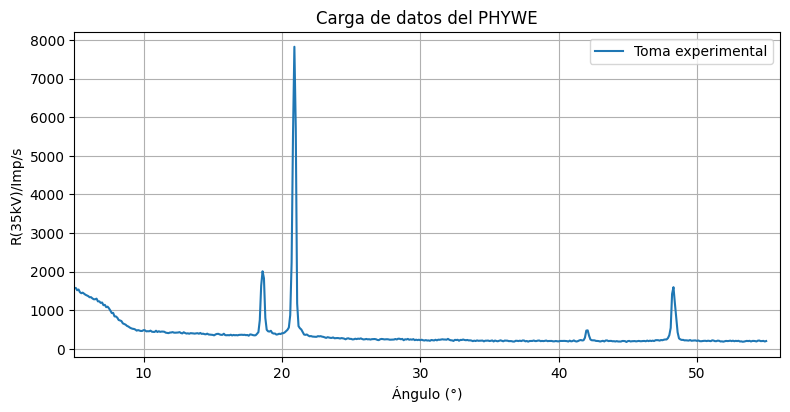

In [61]:
act_1 = np.array(leer_columnas("250821_Actividad1_RayosX_Toma1.txt"))
desfase_deg = 1.7
angulo_corr = act_1[0] - desfase_deg

plt.figure(figsize=(8, 4))

plt.plot(act_1[0], act_1[1], label="Toma experimental")
plt.legend()

plt.xlabel("Ángulo (°)")
plt.ylabel("R(35kV)/Imp/s")
plt.xlim(5,56)
plt.tight_layout()
plt.grid(True)
plt.title("Carga de datos del PHYWE")
plt.show()


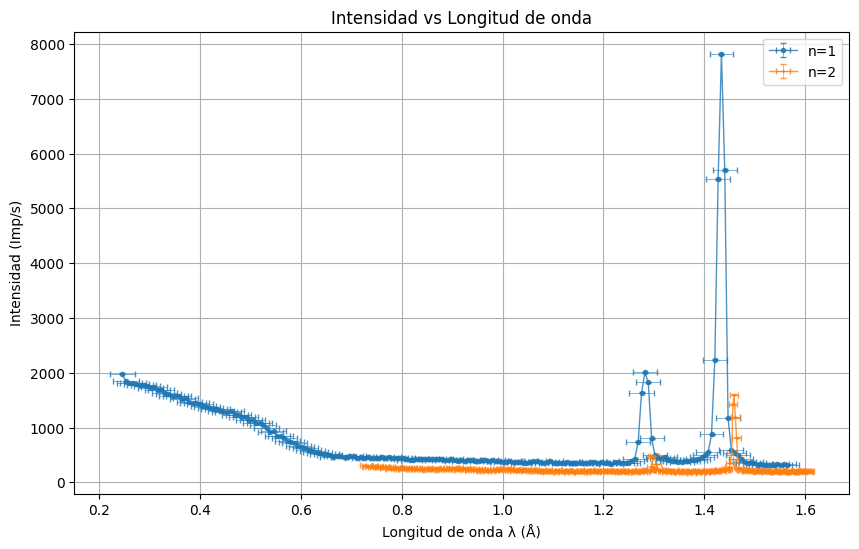

In [114]:
#Ajuste para n1 y n2
toma_n1 = len(act_1[1])//2 -60 ; toma_n2 = len(act_1[1])  #Para ver donde vamos a mochar para n1 y n2
rango_n1 = act_1[1][5:toma_n1] ; rango_n2= act_1[1][toma_n1:toma_n2]


def calcular_longitud_onda(theta_grados,n, d):
    theta_rad = np.radians(theta_grados)
    lambda_m = (2 * d * np.sin(theta_rad)) / n
    incertidumbre = calcular_incertidumbre_lambda(theta_grados, n,d)
    return lambda_m, incertidumbre

def calcular_incertidumbre_lambda(theta_grados,n, d
                                  ,error_sistematico=1.7, error_instrumental=0.1):
    theta_rad = np.radians(theta_grados)
    delta_theta_total = np.radians(error_sistematico + error_instrumental)
    dlambda_dtheta = (2 * d * np.cos(theta_rad)) / n
    delta_lambda = abs(dlambda_dtheta * delta_theta_total)
    
    return delta_lambda


lambda_m, incertidumbre_lambda = calcular_longitud_onda(act_1[0][5:toma_n1], 1, 2.01e-10)  
lambda_m2, incertidumbre_lambda2 =  calcular_longitud_onda(act_1[0][toma_n1:toma_n2]-1.75, 2, 2.01e-10)  # Se ajustó 1.7° por el desfase de la intensidad máxima en la unidad de rayos X

incertidumbre_y1 = np.sqrt(act_1[1][5:toma_n1])
incertidumbre_y2 = np.sqrt(act_1[1][toma_n1:toma_n2])

plt.figure(figsize=(10,6))

plt.errorbar(lambda_m*1e10, rango_n1, 
             xerr=incertidumbre_lambda*1e10*0.2, yerr=incertidumbre_y1*0.2,
             fmt='-o', markersize=3, linewidth=1.0, 
             capsize=2, capthick=1, elinewidth=0.5,
             label="n=1", alpha=0.8)

plt.errorbar(lambda_m2*1e10, rango_n2, 
             xerr=incertidumbre_lambda2*1e10*0.2, yerr=incertidumbre_y2*0.2,
             fmt='-o', markersize=1, linewidth=1.0, 
             capsize=2, capthick=1, elinewidth=0.5,
             label="n=2", alpha=0.8)

plt.xlabel("Longitud de onda λ (Å)")
plt.ylabel("Intensidad (Imp/s)")
plt.title("Intensidad vs Longitud de onda")
plt.grid(True)
plt.legend()
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_4648\1016387685.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


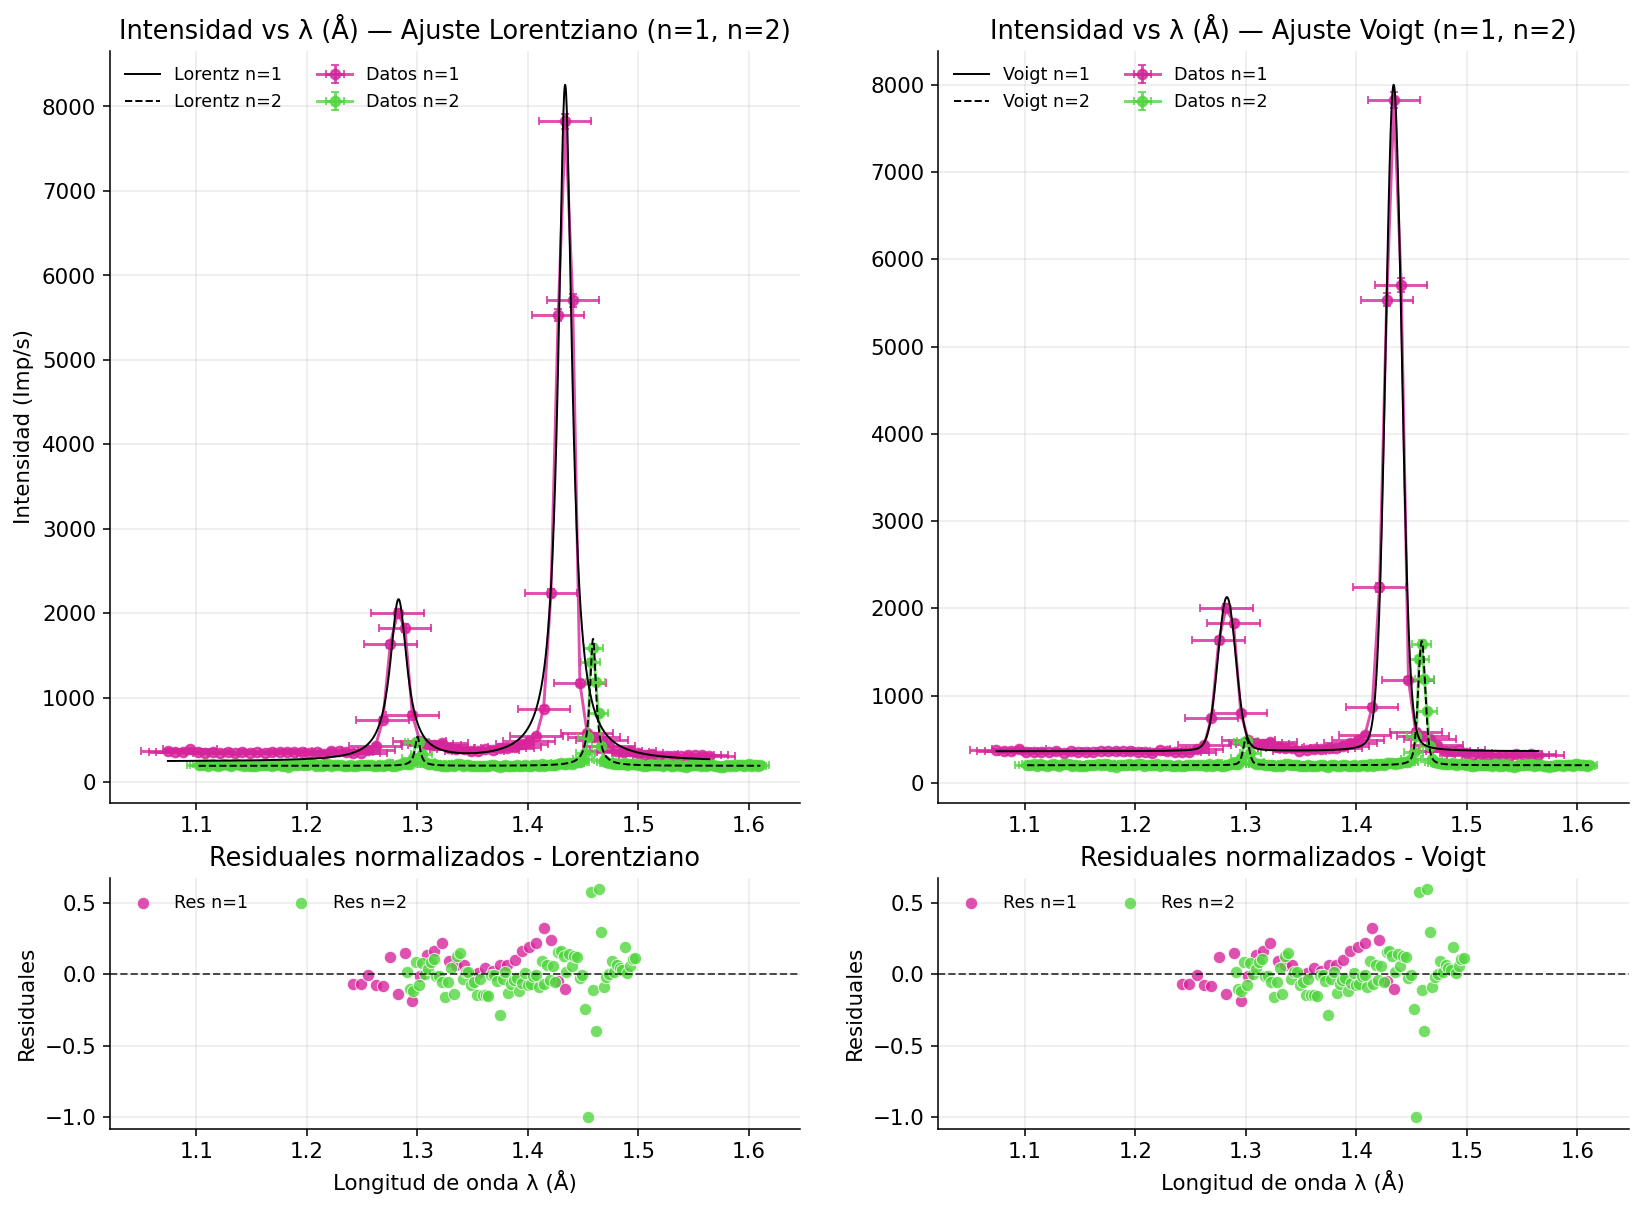

R² Lorentziano n=1: 0.964732
R² Lorentziano n=2: 0.968955

--- Estadísticas Lorentz n=1 ---
Media: 0.0022
Desviación estándar: 0.2328
RMS: 0.2328
χ² reducido: 0.0001

--- Estadísticas Lorentz n=2 ---
Media: -0.0026
Desviación estándar: 0.1854
RMS: 0.1854
χ² reducido: 0.0001

R² Voigt n=1: 0.992113
R² Voigt n=2: 0.983103

--- Estadísticas Voigt n-1 ---
Media: -0.0067
Desviación estándar: 0.1619
RMS: 0.1620
χ² reducido: 0.0000

--- Estadísticas Voigt n-2 ---
Media: -0.0029
Desviación estándar: 0.1324
RMS: 0.1324
χ² reducido: 0.0001

PARÁMETROS DE AJUSTE LORENTZIANO

--- n=1 ---
Pico 1: Centro = 1.4338 Å, Amplitud = 8004.8
Pico 2: Centro = 1.2830 Å, Amplitud = 1902.8

--- n=2 ---
Pico 1: Centro = 1.4591 Å, Amplitud = 1503.3
Pico 2: Centro = 1.3002 Å, Amplitud = 344.6


In [158]:
# Datos de entrada
zoom_m, incertidumbre_zomm, rango_n1_zoom = lambda_m[120:], incertidumbre_lambda[120:], rango_n1[120:]
zoom_m2, incertidumbre_zomm2, rango_n2_zoom = lambda_m2[120:], incertidumbre_lambda2[120:], rango_n2[120:]

x_n1 = np.asarray(zoom_m) * 1e10 ; x_n2 = np.asarray(zoom_m2) * 1e10
y_n1 = np.asarray(rango_n1_zoom, dtype=float); y_n2 = np.asarray(rango_n2_zoom, dtype=float)

# Incertidumbres 
incertidumbre_x1 = np.asarray(incertidumbre_zomm) * 1e10 * 0.2  
incertidumbre_x2 = np.asarray(incertidumbre_zomm2) * 1e10 * 0.2
incertidumbre_y1 = np.sqrt(act_1[1][5:toma_n1])[120:]
incertidumbre_y2 = np.sqrt(act_1[1][toma_n1:toma_n2])[120:]

def two_lorentzian(x, A1, x1, g1, A2, x2, g2, C):
    L1 = A1 * (g1**2 / ((x - x1)**2 + g1**2))
    L2 = A2 * (g2**2 / ((x - x2)**2 + g2**2))
    return L1 + L2 + C

def voigt_profile(x, amp, cen, sigma, gamma):
    z = ((x - cen) + 1j*gamma) / (sigma*np.sqrt(2))
    return amp * np.real(wofz(z)) / (sigma*np.sqrt(2*np.pi))

def multi_voigt(x, *params):
    n = (len(params)-1)//4
    C = params[-1]
    y = np.zeros_like(x, dtype=float)
    for i in range(n):
        amp, cen, sig, gam = params[4*i:4*i+4]
        y += voigt_profile(x, amp, cen, sig, gam)
    return y + C

def fit_two_lorentz(x, y):
    pk, _ = find_peaks(y, height=np.max(y)*0.1, distance=max(5, len(y)//50))
    if len(pk) == 0: 
        pk = np.array([np.argmax(y)])
    if len(pk) == 1: 
        pk = np.append(pk, min(pk[0]+10, len(y)-1))
    pks = pk[np.argsort(y[pk])[::-1][:2]]
    A1, A2 = y[pks[0]], y[pks[1]]*0.8
    x1, x2 = x[pks[0]], x[pks[1]]
    span = x.max()-x.min()
    g0 = 0.05*span
    C0 = np.min(y)
    p0 = [A1, x1, g0, A2, x2, g0, C0]
    lb = [0, x.min(), 1e-6, 0, x.min(), 1e-6, 0]
    ub = [y.max()*2, x.max(), span, y.max()*2, x.max(), span, y.max()*0.5]
    popt, _ = curve_fit(two_lorentzian, x, y, p0=p0, bounds=(lb, ub), maxfev=40000)
    return popt

def fit_multi_voigt(x, y, n_peaks=2):
    pk, _ = find_peaks(y, prominence=0.05*np.ptp(y), distance=max(5, len(y)//50))
    if len(pk) < n_peaks:
        pk = np.argsort(y)[-n_peaks:]
    else:
        pk = pk[np.argsort(y[pk])[::-1][:n_peaks]]
    span = x.max()-x.min()
    p0 = []
    for k in pk[:n_peaks]:
        p0 += [y[k]*0.3, x[k], 0.02*span, 0.02*span]
    p0 += [np.min(y)]
    lb, ub = [], []
    for _ in range(n_peaks):
        lb += [0, x.min(), 1e-6, 1e-6]
        ub += [y.max()*3, x.max(), 0.5*span, 0.5*span]
    lb += [0]; ub += [y.max()*0.5]
    popt, _ = curve_fit(multi_voigt, x, y, p0=p0, bounds=(lb, ub), maxfev=60000)
    return popt

# Realizar ajustes
pL_n1 = fit_two_lorentz(x_n1, y_n1); pL_n2 = fit_two_lorentz(x_n2, y_n2)
pV_n1 = fit_multi_voigt(x_n1, y_n1, n_peaks=2); pV_n2 = fit_multi_voigt(x_n2, y_n2, n_peaks=2)

# Predicciones en malla fina (para curvas suaves)
xf1 = np.linspace(x_n1.min(), x_n1.max(), 1600)
xf2 = np.linspace(x_n2.min(), x_n2.max(), 1600)
yL1_f = two_lorentzian(xf1, *pL_n1); yL2_f = two_lorentzian(xf2, *pL_n2)
yV1_f = multi_voigt(xf1, *pV_n1); yV2_f = multi_voigt(xf2, *pV_n2)

# Predicciones en los puntos de datos (para residuales)
yL1_d = two_lorentzian(x_n1, *pL_n1); yL2_d = two_lorentzian(x_n2, *pL_n2)
yV1_d = multi_voigt(x_n1, *pV_n1); yV2_d = multi_voigt(x_n2, *pV_n2)

# Residuales
# Residuales NORMALIZADOS: r = (y_exp - y_fit) / σ_y
denom1 = np.clip(np.asarray(incertidumbre_y1, dtype=float), 1e-12, None)
denom2 = np.clip(np.asarray(incertidumbre_y2, dtype=float), 1e-12, None)

rL1 = (y_n1 - yL1_d) / denom1
rL2 = (y_n2 - yL2_d) / denom2
rV1 = (y_n1 - yV1_d) / denom1
rV2 = (y_n2 - yV2_d) / denom2
# Escalar residuales a [-1, 1] por máximo absoluto
def _pm1(r):
    m = np.nanmax(np.abs(r))
    if not np.isfinite(m) or m < 1e-12:
        return r
    return np.clip(r / m, -1.0, 1.0)

rL1 = _pm1(rL1)
rL2 = _pm1(rL2)
rV1 = _pm1(rV1)
rV2 = _pm1(rV2)


# Configuración de estilo
# Configuración de estilo
plt.rcParams.update({
    "figure.dpi": 140,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.grid": True,
    "grid.alpha": 0.25,
    "axes.axisbelow": True,
    "legend.frameon": False,
    "font.size": 11
})

fig = plt.figure(figsize=(14, 10))
gs = GridSpec(2, 2, height_ratios=[3, 1], hspace=0.15, wspace=0.2)

# Colores girly para n=1 y n=2
color_n1 = "#D6259B"  
color_n2 = "#51D63F" 

# Colores para las curvas de ajuste
curve_color = "#000000"  # Púrpura medio

# Subplot 0,0: Ajuste Lorentziano
ax00 = fig.add_subplot(gs[0,0])
ax00.errorbar(x_n1, y_n1, xerr=incertidumbre_x1, yerr=incertidumbre_y1, 
             fmt='-o', markersize=5, capsize=2, alpha=0.8, color=color_n1, 
             label='Datos n=1', zorder=1)
ax00.errorbar(x_n2, y_n2, xerr=incertidumbre_x2, yerr=incertidumbre_y2, 
             fmt='-o', markersize=5, capsize=2, alpha=0.8, color=color_n2, 
             label='Datos n=2', zorder=1)
ax00.plot(xf1, yL1_f, linestyle= "-", lw=1, color=curve_color, label='Lorentz n=1')
ax00.plot(xf2, yL2_f, linestyle ="--", lw=1, color=curve_color, label='Lorentz n=2')
ax00.set_title("Intensidad vs λ (Å) — Ajuste Lorentziano (n=1, n=2)")
ax00.set_ylabel("Intensidad (Imp/s)")
ax00.legend(ncols=2, fontsize=9)

# Subplot 0,1: Ajuste Voigt
ax01 = fig.add_subplot(gs[0,1])
ax01.errorbar(x_n1, y_n1, xerr=incertidumbre_x1, yerr=incertidumbre_y1, 
             fmt='-o', markersize=5, capsize=2, alpha=0.8, color=color_n1, 
             label='Datos n=1', zorder=1)
ax01.errorbar(x_n2, y_n2, xerr=incertidumbre_x2, yerr=incertidumbre_y2, 
             fmt='-o', markersize=5, capsize=2, alpha=0.8, color=color_n2, 
             label='Datos n=2', zorder=1)
ax01.plot(xf1, yV1_f, linestyle= "-" , lw=1, color=curve_color, label='Voigt n=1')
ax01.plot(xf2, yV2_f, linestyle = "--",  lw=1, color=curve_color, label='Voigt n=2')
ax01.set_title("Intensidad vs λ (Å) — Ajuste Voigt (n=1, n=2)")
ax01.legend(ncols=2, fontsize=9)

# Subplot 1,0: Residuales Lorentziano
ax10 = fig.add_subplot(gs[1,0], sharex=ax00)
ax10.axhline(0, ls='--', lw=1, color= "#000000", alpha=0.7)
# Residuales como puntitos
ax10.scatter(x_n1[len(x_n1)//3:len(x_n1)//2+len(x_n1)//4], rV1[len(x_n1)//3:len(x_n1)//2 +len(x_n1)//4], s=40, alpha=0.8, color=color_n1, 
             label='Res n=1', marker='o', edgecolors='white', linewidth=0.5)
ax10.scatter(x_n2[len(x_n2)//3:len(x_n2)//2 +len(x_n2)//4], rV2[len(x_n2)//3: len(x_n2)//2 + len(x_n2)//4], s=40, alpha=0.8, color=color_n2, 
             label='Res n=2', marker='o', edgecolors='white', linewidth=0.5)
ax10.set_xlabel("Longitud de onda λ (Å)")
ax10.set_ylabel("Residuales")
ax10.set_title("Residuales normalizados - Lorentziano")
ax10.legend(ncols=2, fontsize=9)

# Subplot 1,1: Residuales Voigt
ax11 = fig.add_subplot(gs[1,1], sharex=ax01)
ax11.axhline(0, ls='--', lw=1, color="#000000", alpha=0.7)
# Residuales como puntitos
ax11.scatter(x_n1[len(x_n1)//3:len(x_n1)//2+len(x_n1)//4], rV1[len(x_n1)//3:len(x_n1)//2 +len(x_n1)//4], s=40, alpha=0.8, color=color_n1, 
             label='Res n=1', marker='o', edgecolors='white', linewidth=0.5)
ax11.scatter(x_n2[len(x_n2)//3:len(x_n2)//2 +len(x_n2)//4], rV2[len(x_n2)//3: len(x_n2)//2 + len(x_n2)//4], s=40, alpha=0.8, color=color_n2, 
             label='Res n=2', marker='o', edgecolors='white', linewidth=0.5)
ax11.set_xlabel("Longitud de onda λ (Å)")
ax11.set_ylabel("Residuales")
ax11.set_title("Residuales normalizados - Voigt")
ax11.legend(ncols=2, fontsize=9)
fig.tight_layout()
plt.show()
# Cálculo de R² y estadísticas
def calcular_r2(y_real, y_pred):
    ss_res = np.sum((y_real - y_pred)**2)
    ss_tot = np.sum((y_real - np.mean(y_real))**2)
    return 1 - (ss_res / ss_tot)

def estadisticas_residuales(residuales, incertidumbres, nombre):
    print(f"\n--- Estadísticas {nombre} ---")
    print(f"Media: {np.mean(residuales):.4f}")
    print(f"Desviación estándar: {np.std(residuales):.4f}")
    print(f"RMS: {np.sqrt(np.mean(residuales**2)):.4f}")
    print(f"χ² reducido: {np.sum((residuales/incertidumbres)**2) / (len(residuales)-7):.4f}")

# Estadísticas para Lorentziano
r2_L1 = calcular_r2(y_n1, yL1_d)
r2_L2 = calcular_r2(y_n2, yL2_d)
print(f"R² Lorentziano n=1: {r2_L1:.6f}")
print(f"R² Lorentziano n=2: {r2_L2:.6f}")
estadisticas_residuales(rL1, incertidumbre_y1, "Lorentz n=1")
estadisticas_residuales(rL2, incertidumbre_y2, "Lorentz n=2")

# Estadísticas para Voigt
r2_V1 = calcular_r2(y_n1, yV1_d)
r2_V2 = calcular_r2(y_n2, yV2_d)
print(f"\nR² Voigt n=1: {r2_V1:.6f}")
print(f"R² Voigt n=2: {r2_V2:.6f}")
estadisticas_residuales(rV1, incertidumbre_y1, "Voigt n-1")
estadisticas_residuales(rV2, incertidumbre_y2, "Voigt n-2")

# Parámetros de los ajustes
print("\n" + "="*60)
print("PARÁMETROS DE AJUSTE LORENTZIANO")
print("="*60)
print("\n--- n=1 ---")
print(f"Pico 1: Centro = {pL_n1[1]:.4f} Å, Amplitud = {pL_n1[0]:.1f}")
print(f"Pico 2: Centro = {pL_n1[4]:.4f} Å, Amplitud = {pL_n1[3]:.1f}")

print("\n--- n=2 ---")
print(f"Pico 1: Centro = {pL_n2[1]:.4f} Å, Amplitud = {pL_n2[0]:.1f}")
print(f"Pico 2: Centro = {pL_n2[4]:.4f} Å, Amplitud = {pL_n2[3]:.1f}")

In [173]:
import numpy as np

# --- Ajusta si tu cristal NO es LiF(200) ---
d_angstrom = 2.014  # [Å]  (LiF típico). Cambia según tu d real.

# Constantes
deg2rad = np.pi/180.0
sigma_theta_stat_deg = 0.1     # instrumental (aleatoria) en grados
sigma_theta_sys_deg  = 1.7     # sistemática común en grados
sigma_theta_stat = sigma_theta_stat_deg*deg2rad
sigma_theta_sys  = sigma_theta_sys_deg*deg2rad
hc_eVA = 12398.419843320026    # [eV·Å]

def theta_from_lambda(lam, n, d):
    # Bragg: n*λ = 2 d sinθ
    arg = np.clip(n*lam/(2.0*d), -1.0, 1.0)
    return np.arcsin(arg)

def dlam_dtheta(lam, n, d):
    # dλ/dθ = (2 d cosθ)/n  = λ cotθ
    th = theta_from_lambda(lam, n, d)
    return 2.0*d*np.cos(th)/n

def wmean(vals, sigmas):
    w = 1.0/np.clip(np.asarray(sigmas, float)**2, 1e-30, None)
    mu = np.sum(w*np.asarray(vals, float))/np.sum(w)
    sem = np.sqrt(1.0/np.sum(w))
    return mu, sem

def combine_sys_for_mean(a1, a2, sigma_theta_sys):
    # λ̄ = (λ1+λ2)/2 con desplazamiento angular común → dλ̄/dθ = (a1+a2)/2
    return 0.5*abs(a1 + a2) * sigma_theta_sys

# --- Extrae centros (λ en Å) de tus ajustes Lorentz (dos picos en idx 1 y 4) ---
# Si prefieres Voigt, cambia los índices abajo (en Voigt: centros en 1 y 5)
lam1_n1, lam2_n1 = float(pL_n1[1]), float(pL_n1[4])  # n=1, pico1/pico2
lam1_n2, lam2_n2 = float(pL_n2[1]), float(pL_n2[4])  # n=2, pico1/pico2

# --- Propaga σθ a σλ para cada orden y pico ---
def lambda_unc_from_theta(lam, n, d, sigma_theta):
    return abs(dlam_dtheta(lam, n, d)) * sigma_theta

# Pico 1
siglam1_stat_n1 = lambda_unc_from_theta(lam1_n1, 1, d_angstrom, sigma_theta_stat)
siglam1_stat_n2 = lambda_unc_from_theta(lam1_n2, 2, d_angstrom, sigma_theta_stat)
a1_n1 = abs(dlam_dtheta(lam1_n1, 1, d_angstrom))
a1_n2 = abs(dlam_dtheta(lam1_n2, 2, d_angstrom))
siglam1_sys_n1 = a1_n1 * sigma_theta_sys
siglam1_sys_n2 = a1_n2 * sigma_theta_sys

# Pico 2
siglam2_stat_n1 = lambda_unc_from_theta(lam2_n1, 1, d_angstrom, sigma_theta_stat)
siglam2_stat_n2 = lambda_unc_from_theta(lam2_n2, 2, d_angstrom, sigma_theta_stat)
a2_n1 = abs(dlam_dtheta(lam2_n1, 1, d_angstrom))
a2_n2 = abs(dlam_dtheta(lam2_n2, 2, d_angstrom))
siglam2_sys_n1 = a2_n1 * sigma_theta_sys
siglam2_sys_n2 = a2_n2 * sigma_theta_sys

# --- Promedio entre n=1 y n=2 por pico (ponderado SOLO con estadística) ---
lam1_bar, siglam1_stat_bar = wmean([lam1_n1, lam1_n2], [siglam1_stat_n1, siglam1_stat_n2])
lam2_bar, siglam2_stat_bar = wmean([lam2_n1, lam2_n2], [siglam2_stat_n1, siglam2_stat_n2])

# Sistemática del promedio (correlacionada, no se reduce)
siglam1_sys_bar = combine_sys_for_mean(a1_n1, a1_n2, sigma_theta_sys)
siglam2_sys_bar = combine_sys_for_mean(a2_n1, a2_n2, sigma_theta_sys)

# --- Energía y propagación ---
def energy_and_unc(lam, siglam_stat, siglam_sys):
    E = hc_eVA/lam
    dEdlam = hc_eVA/(lam**2)
    return (E, dEdlam*siglam_stat, dEdlam*siglam_sys)

E1, sE1_stat, sE1_sys = energy_and_unc(lam1_bar, siglam1_stat_bar, siglam1_sys_bar)
E2, sE2_stat, sE2_sys = energy_and_unc(lam2_bar, siglam2_stat_bar, siglam2_sys_bar)

# --- Reporte ---
print("== Picos (λ en Å) ==")
print(f"Pico1: n=1 -> {lam1_n1:.6f} Å ; n=2 -> {lam1_n2:.6f} Å")
print(f"Pico2: n=1 -> {lam2_n1:.6f} Å ; n=2 -> {lam2_n2:.6f} Å")

print("\n== Promedio entre órdenes (λ̄ ± σ_stat ⊕ σ_sys) ==")
print(f"Pico1: λ̄ = {lam1_bar:.6f} Å  ± {siglam1_stat_bar:.6f} (stat)  ± {siglam1_sys_bar:.6f} (sys)")
print(f"Pico2: λ̄ = {lam2_bar:.6f} Å  ± {siglam2_stat_bar:.6f} (stat)  ± {siglam2_sys_bar:.6f} (sys)")

print("\n== Energía (E = hc/λ̄) ==")
print(f"Pico1: E = {E1:.3f} eV  ± {sE1_stat:.3f} (stat)  ± {sE1_sys:.3f} (sys)")
print(f"Pico2: E = {E2:.3f} eV  ± {sE2_stat:.3f} (stat)  ± {sE2_sys:.3f} (sys)")


== Picos (λ en Å) ==
Pico1: n=1 -> 1.432887 Å ; n=2 -> 1.459205 Å
Pico2: n=1 -> 1.132098 Å ; n=2 -> 1.300340 Å

== Promedio entre órdenes (λ̄ ± σ_stat ⊕ σ_sys) ==
Pico1: λ̄ = 1.456055 Å  ± 0.002273 (stat)  ± 0.076441 (sys)
Pico2: λ̄ = 1.277348 Å  ± 0.002494 (stat)  ± 0.080164 (sys)

== Energía (E = hc/λ̄) ==
Pico1: E = 8515.077 eV  ± 13.293 (stat)  ± 447.032 (sys)
Pico2: E = 9706.373 eV  ± 18.952 (stat)  ± 609.153 (sys)


In [175]:
# == Ingresa tus valores teóricos (en eV) ==
E1_th = 8047  # p. ej., 8047.78  (Kα Cu)  <-- pon tu valor
E2_th = 8905 # p. ej., 8905.29  (Kβ Cu)  <-- pon tu valor

import numpy as np

def accuracy_report(E_meas, s_stat, s_sys, E_th, tag=""):
    dE = E_meas - E_th                      # sesgo (error absoluto)
    rel = 100.0*abs(dE)/abs(E_th)           # error relativo %
    s_tot = np.sqrt(s_stat**2 + s_sys**2)   # incertidumbre total (cuadratura)
    pull = dE/s_tot if s_tot>0 else np.nan  # discrepancia en sigmas
    print(f"{tag}E_meas = {E_meas:.6f} eV")
    print(f"{tag}E_th   = {E_th:.6f} eV")
    print(f"{tag}Error absoluto  = {dE:+.6f} eV")
    print(f"{tag}Error relativo  = {rel:.4f} %")
    print(f"{tag}σ_stat = {s_stat:.6f} eV,  σ_sys = {s_sys:.6f} eV,  σ_tot = {s_tot:.6f} eV")
    print(f"{tag}Compatibilidad  = {pull:+.2f} σ\n")
    return dE, rel, s_tot, pull

# Usa los resultados que ya calculaste arriba:
# Pico1: E1, sE1_stat, sE1_sys
# Pico2: E2, sE2_stat, sE2_sys
print("== Exactitud vs. valor teórico ==")
acc1 = accuracy_report(E1, sE1_stat, sE1_sys, E1_th, tag="Pico1: ")
acc2 = accuracy_report(E2, sE2_stat, sE2_sys, E2_th, tag="Pico2: ")


== Exactitud vs. valor teórico ==
Pico1: E_meas = 8515.077412 eV
Pico1: E_th   = 8047.000000 eV
Pico1: Error absoluto  = +468.077412 eV
Pico1: Error relativo  = 5.8168 %
Pico1: σ_stat = 13.293405 eV,  σ_sys = 447.031634 eV,  σ_tot = 447.229243 eV
Pico1: Compatibilidad  = +1.05 σ

Pico2: E_meas = 9706.372965 eV
Pico2: E_th   = 8905.000000 eV
Pico2: Error absoluto  = +801.372965 eV
Pico2: Error relativo  = 8.9991 %
Pico2: σ_stat = 18.952262 eV,  σ_sys = 609.153196 eV,  σ_tot = 609.447951 eV
Pico2: Compatibilidad  = +1.31 σ



<h4> <b>Conclusiones preliminares</b> </h4>

<p> <b>Objetivo:</b> Con esta actividad, se busca identificar los picos de radiación característica del ánodo. En este momento desconocemos si hay aplicaciones u otras interpretaciones que deberíamos considerar para el informe.</p>

<b>Reflexión general de las gráficas: </b>  

<p> En la primera imagen, se graficó Ángulo del Cristal (°) vs R (35kv/Imp/s) se puede ver cuatros líneas relacionadas con las transiciones para la producción de Rayos X característicos. Dónde las primeras son el decaimiento en n=1 y las otras dos será n =2. Por otro lado, no conocemos a que corresponde la intensidad entre los ángulos 0 y 10. Debido a esta razón fueron excluidos para los ajustes y gráficas posteriores hasta poder reconocer la función de esos datos. </p>

<p>Para la segunda se graficó intensidad y longitud de onda obtenido de la ecuación de Bragg. Aún no tenemos en cuenta los ajustes a los picos comparación entre un ajuste lorentziano y un perfil Vogit. </p>

<p> En la tercera se graficó intensidad y longitud de onda obtenido de la ecuación de Bragg. Dónde tuvimos el ajuste de los picos dado por un ajuste Lorentziano y otro por el ajuste de perfil de Voigt sin la seguridad de que estuviera bien acorde a la literatura o si estuvieron demasiado adecuados para nuestros datos. Luego de esto se pudo reconocer que el perfil de Voigt es más preciso al integrar un pico adicional en comparación del ajuste Lorentziano. Dónde aún no tuvimos en cuenta residuales del ajuste pero preguntaremos si es relevante.</p>

<h3> Actividad 2:</h3>

La absorción de los rayos X usando la relación μ/ρ . A lo largo de la práctica se varía el espesor de cada material, Al y Zn en este caso.


<p>Ángulo Intensidad Máxima : 20,9 °. d del LiF = 201 pm. Con unos absorvedores de Al de 0,1 mm, 0,08 mm y 0,06 mm ,para la primera toma de datos.</p>

<p> Ángulo Intensidad Máxima : 20,7°. d del LiF = 201 pm. Con unos absorvedores de Al de 0,02 mm y 0,04 mm; Zn de 0,075 mm, 0,025nm. para la segunda toma de datos</p> 

In [9]:
act_2_1 = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida1.txt") # Al 0,1 mm 
act_2_2  = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida2.txt")  #Al 0,08 mm
act_2_3  = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida3.txt")  #Al 0,06 mm
act_2_4 = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida4.txt")  #Al 0,02 mm
act_2_5 = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida5.txt")  #Al 0,04 mm

act_2_6 =  leer_columnas("250821_Actividad2_RayosX_Toma1_Medida6.txt")  #Zn 0,075 mm
act_2_7 =  leer_columnas("250821_Actividad2_RayosX_Toma1_Medida7.txt")  #Zn 0,025 mm


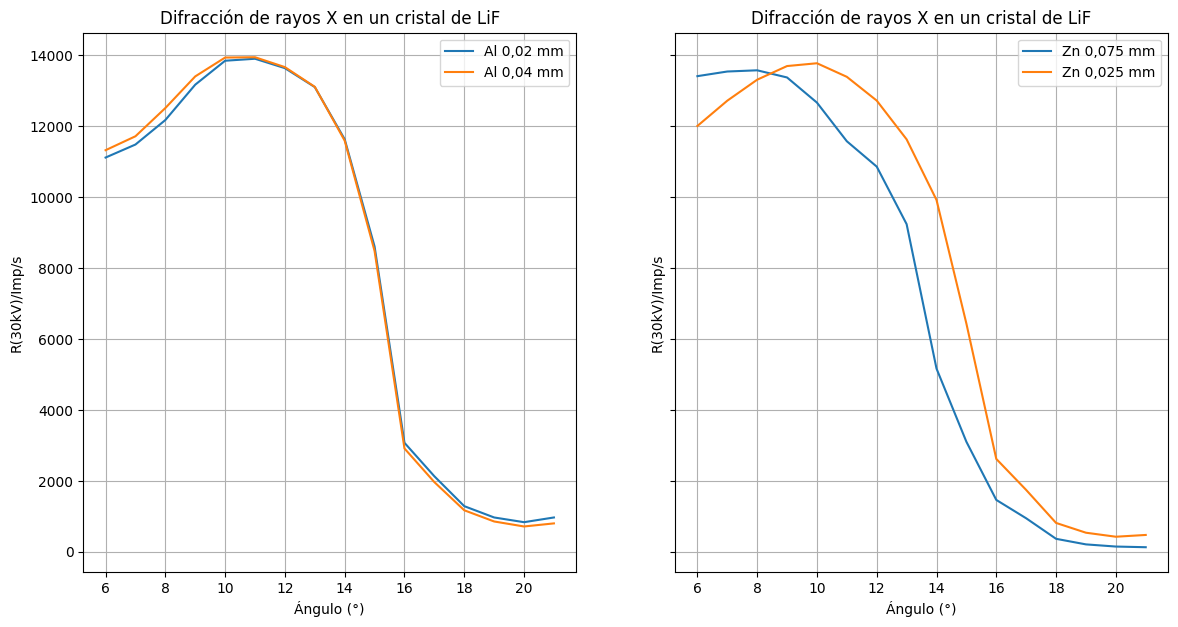

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 7), sharey=True)

ax1.set_xlabel("Ángulo (°)")
ax1.set_ylabel("R(30kV)/Imp/s")
ax1.set_title("Difracción de rayos X en un cristal de LiF")
ax1.grid(True)
ax1.plot(act_2_4[0], act_2_4[1], label="Al 0,02 mm")
ax1.plot(act_2_5[0], act_2_5[1], label="Al 0,04 mm")
ax1.legend()    

ax2.set_xlabel("Ángulo (°)")
ax2.set_ylabel("R(30kV)/Imp/s")
ax2.set_title("Difracción de rayos X en un cristal de LiF")
ax2.grid(True)
ax2.plot(act_2_6[0], act_2_6[1], label="Zn 0,075 mm")
ax2.plot(act_2_7[0], act_2_7[1], label="Zn 0,025 mm")
ax2.legend()    


Gráfica de regresiones logaritmicas de Intensidad contra espesor para AI y Zn

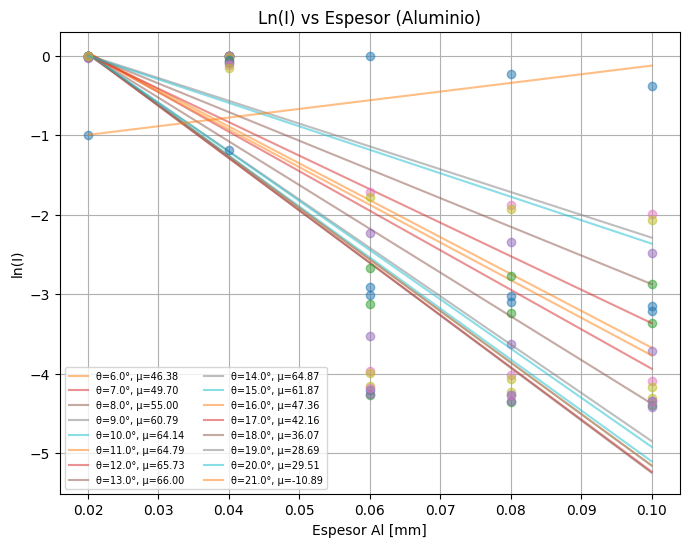

C:\Users\user\AppData\Local\Temp\ipykernel_4648\3805721064.py:55: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(linear, espesores_Zn, lnI_zn)


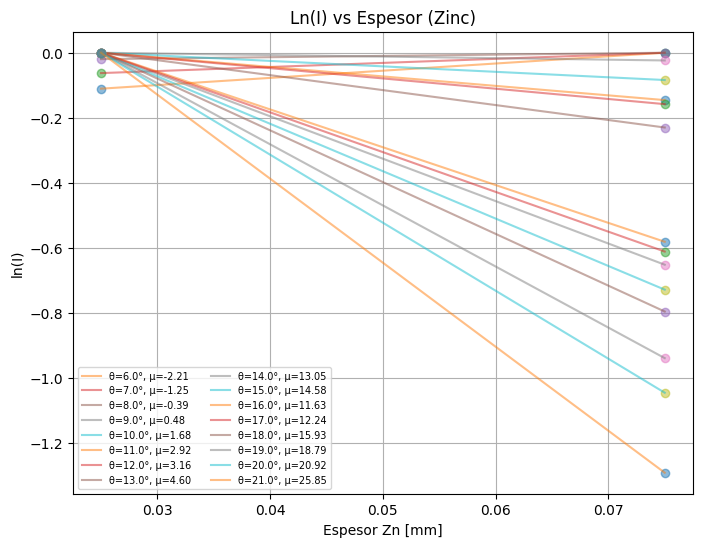

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --------------------------
# Función lineal
# --------------------------
def linear(x, a, b):
    return a*x + b   # a = -μ , b = ln(I0)

# --------------------------
# Espesores y datos
# --------------------------
espesores_Al = np.array([0.10, 0.08, 0.06, 0.04, 0.02])  # mm
datos_Al = [act_2_1, act_2_2, act_2_3, act_2_5, act_2_4]

espesores_Zn = np.array([0.075, 0.025])  # mm
datos_Zn = [act_2_6, act_2_7]

thetas = datos_Al[0][0]   # primera columna = ángulos

# --------------------------
# Graficar todas juntas - ALUMINIO
# --------------------------
plt.figure(figsize=(8,6))
for i, th in enumerate(thetas):
    I_al = np.array([np.interp(th, d[0], d[1]) for d in datos_Al])
    I_al = I_al / np.max(I_al)
    lnI_al = np.log(I_al)

    if np.all(np.isfinite(lnI_al)):  # evitar problemas con log(0)
        popt, _ = curve_fit(linear, espesores_Al, lnI_al)
        fit = linear(espesores_Al, *popt)
        plt.plot(espesores_Al, lnI_al, "o", alpha=0.5)
        plt.plot(espesores_Al, fit, "-", alpha=0.5,
                 label=f"θ={th:.1f}°, μ={-popt[0]:.2f}")

plt.xlabel("Espesor Al [mm]")
plt.ylabel("ln(I)")
plt.title("Ln(I) vs Espesor (Aluminio)")
plt.legend(fontsize=7, ncol=2)
plt.grid(True)
plt.show()

# --------------------------
# Graficar todas juntas - ZINC
# --------------------------
plt.figure(figsize=(8,6))
for i, th in enumerate(thetas):
    I_zn = np.array([np.interp(th, d[0], d[1]) for d in datos_Zn])
    I_zn = I_zn / np.max(I_zn)
    lnI_zn = np.log(I_zn)

    if np.all(np.isfinite(lnI_zn)) and len(espesores_Zn) >= 2:
        popt, _ = curve_fit(linear, espesores_Zn, lnI_zn)
        fit = linear(espesores_Zn, *popt)
        plt.plot(espesores_Zn, lnI_zn, "o", alpha=0.5)
        plt.plot(espesores_Zn, fit, "-", alpha=0.5,
                 label=f"θ={th:.1f}°, μ={-popt[0]:.2f}")

plt.xlabel("Espesor Zn [mm]")
plt.ylabel("ln(I)")
plt.title("Ln(I) vs Espesor (Zinc)")
plt.legend(fontsize=7, ncol=2)
plt.grid(True)
plt.show()


Tablas con incertidumbre de AI y Zn

In [12]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# --------------------------
# Función lineal
# --------------------------
def linear(x, a, b):
    return a*x + b

# --------------------------
# Ejemplo con Aluminio
# --------------------------
espesores_Al = np.array([0.10, 0.08, 0.06, 0.04, 0.02])  # mm
datos_Al = [act_2_1, act_2_2, act_2_3, act_2_5, act_2_4]
thetas = datos_Al[0][0]

rows = []
for i, th in enumerate(thetas):
    I_al = np.array([np.interp(th, d[0], d[1]) for d in datos_Al])
    I_al = I_al / np.max(I_al)
    lnI_al = np.log(I_al)

    if np.all(np.isfinite(lnI_al)):
        popt, pcov = curve_fit(linear, espesores_Al, lnI_al)
        slope, intercept = popt
        perr = np.sqrt(np.diag(pcov))   # incertidumbres
        slope_err = perr[0]

        # Calcular R^2
        y_fit = linear(espesores_Al, *popt)
        ss_res = np.sum((lnI_al - y_fit) ** 2)
        ss_tot = np.sum((lnI_al - np.mean(lnI_al)) ** 2)
        r2 = 1 - (ss_res / ss_tot)

        rows.append({
            "Data": f"I{i+1}",
            "Pendiente (a)": slope,
            "Incertidumbre": slope_err,
            "R²": r2
        })


df = pd.DataFrame(rows)
df["Pendiente (a)"] = df["Pendiente (a)"].map(lambda x: f"{x:.5f}")
df["Incertidumbre"] = df["Incertidumbre"].map(lambda x: f"±{x:.5f}")
df["R²"] = df["R²"].map(lambda x: f"{x:.5f}")

print(df)


df.to_csv("tabla_resultados.csv", index=False)


   Data Pendiente (a) Incertidumbre       R²
0    I1     -46.37790     ±13.96857  0.78607
1    I2     -49.69741     ±15.02398  0.78482
2    I3     -55.00385     ±17.17066  0.77378
3    I4     -60.79381     ±19.52012  0.76377
4    I5     -64.14254     ±20.39051  0.76736
5    I6     -64.79231     ±20.65336  0.76638
6    I7     -65.73109     ±21.06593  0.76445
7    I8     -66.00424     ±20.91466  0.76851
8    I9     -64.86547     ±20.51237  0.76923
9   I10     -61.87493     ±19.43958  0.77153
10  I11     -47.36461     ±14.29933  0.78528
11  I12     -42.15983     ±12.48755  0.79164
12  I13     -36.07059     ±10.07651  0.81030
13  I14     -28.69240      ±7.31114  0.83697
14  I15     -29.51215      ±7.36799  0.84247
15  I16      10.89201      ±6.84350  0.45781


Exponente p = -0.945 ± 0.479


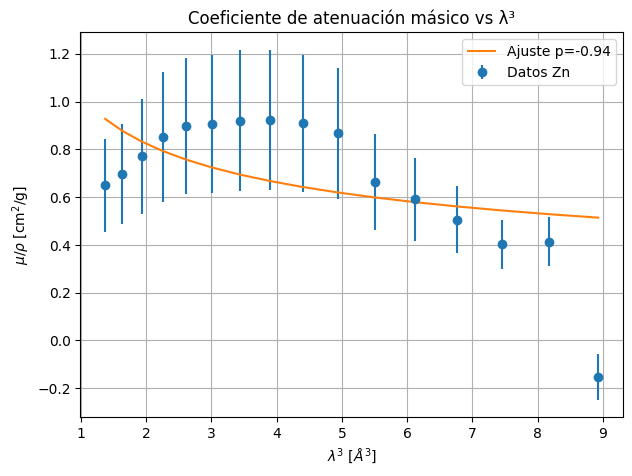

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --------------------------
# Datos (pendientes en 1/mm)
mu_mm = np.array([
 -46.37790, -49.69741, -55.00385, -60.79381, -64.14254, -64.79231, 
 -65.73109, -66.00424, -64.86547, -61.87493, -47.36461, -42.15983, 
 -36.07059, -28.69240, -29.51215,  10.89201
])

# Ángulos asociados (ejemplo: 16° a 31°, ajustar con tus valores reales)
thetas_deg = np.arange(16, 32)  

# --------------------------
# Conversión de unidades
mu_cm = -mu_mm * 0.1   # pasar a 1/cm y signo positivo
rho_Zn = 7.14          # g/cm^3 (cambia a Al si es el caso)
mu_rho = mu_cm / rho_Zn

# --------------------------
# Cálculo de λ y λ³
d = 201.4e-12  # m (ejemplo: NaCl)
thetas = np.radians(thetas_deg)
lambda_vals = 2*d*np.sin(thetas)   # en m
lambda_A = lambda_vals*1e10        # en Å
lambda_cub = lambda_A**3

# --------------------------
# Ajuste en escala log-log
def modelo(x, C, p):
    return C * (x**p)

popt, pcov = curve_fit(modelo, lambda_A, mu_rho, maxfev=5000)
C_fit, p_fit = popt
p_err = np.sqrt(np.diag(pcov))[1]

print(f"Exponente p = {p_fit:.3f} ± {p_err:.3f}")

# Incertidumbre en 1/mm (de tu tabla)
err_mm = np.array([
  13.96857, 15.02398, 17.17066, 19.52012, 20.39051, 20.65336, 21.06593, 20.91466,
  20.51237, 19.43958, 14.29933, 12.48755, 10.07651,  7.31114,  7.36799,  6.84350
])

# Convertir a 1/cm
err_cm = err_mm * 0.1

# Pasar a error de mu/rho
err_mu_rho = err_cm / rho_Zn




# --------------------------
# Gráfica
plt.figure(figsize=(7,5))
plt.errorbar(lambda_cub, mu_rho, yerr=err_mu_rho, fmt="o", label="Datos Zn")
plt.plot(lambda_cub, modelo(lambda_A, *popt), "-", label=f"Ajuste p={p_fit:.2f}")
plt.xlabel(r"$\lambda^3$ [$\AA^3$]")
plt.ylabel(r"$\mu / \rho$ [cm$^2$/g]")
plt.title("Coeficiente de atenuación másico vs λ³")
plt.legend()
plt.grid(True)
plt.show()


Conclusiones de este resultado:  
No se obtiene la recta esperada, significando que En lugar de una dependencia cúbica, el ajuste arroja un exponente cercano a -0.94 indicando que el coeficiente de atenuación másico decrece aproximadamente como lambda^-1 difiriendo del valor teórico. Este error se produce debido a dispersión en la geometría de medición, fluorescencia, o no linealidad del detector pueden sumar señal no atenuada. Desde el punto de vista energético, las longitudes de onda medidas pueden situar al experimento en una región donde la interacción Compton u otros procesos contribuyen significativamente.

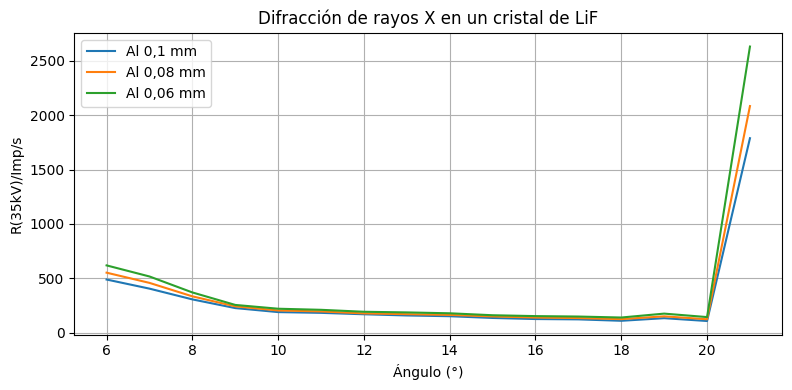

In [14]:
plt.figure(figsize=(8, 4))
plt.xlabel("Ángulo (°)")
plt.ylabel("R(35kV)/Imp/s")
plt.title("Difracción de rayos X en un cristal de LiF")
plt.tight_layout()
plt.grid(True)

plt.plot(act_2_1[0], act_2_1[1], label="Al 0,1 mm ")
plt.plot(act_2_2[0], act_2_2[1], label="Al 0,08 mm")
plt.plot(act_2_3[0], act_2_3[1], label="Al 0,06 mm")
plt.legend()
plt.show()

<h4> Conclusiones iniciales </h4>

Hehe

<h3>Actividad 3: </h3>

<p> 1. Se varia el voltaje de (11,35) kV variando de a 2kV, corriente (una se deja constante) con el valor de 1mA y con ángulo variante entre (19°,24°) con un aumento de 0,1°.</p>

<p> 2. Se varia la corriente (0,1,1)mA variando de a 0,1 mA, un voltaje constante de 35 kV y con ángulo variante entre (19°,24°) con un aumento de 0,1°. </p>

In [15]:
act_3_1 = leer_columnas("250821_Actividad3_RayosX_Toma1.txt") # Voltaje Variando
act_3_2 = leer_columnas("250821_Actividad3_RayosX_Toma1_Medida1.txt") # Corriente Variando 0,1 mA
act_3_3 = leer_columnas("250821_Actividad3_RayosX_Toma1_Medida2.txt") # Corriente Variando 0,5 mA
act_3_4 = leer_columnas("250821_Actividad3_RayosX_Toma1_Medida3.txt") # Corriente Variando 0, 8mA

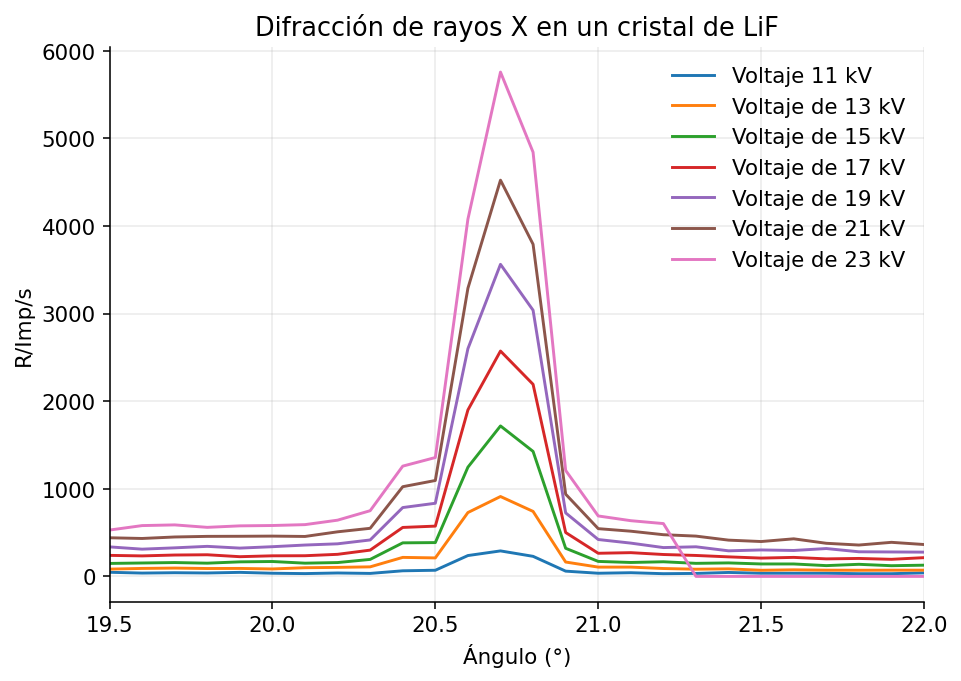

In [176]:
plt.figure(figsize=(7, 5))

plt.plot(act_3_1[0], act_3_1[1], label="Voltaje 11 kV")
plt.plot(act_3_1[0], act_3_1[2], label="Voltaje de 13 kV")
plt.plot(act_3_1[0], act_3_1[3], label="Voltaje de 15 kV")
plt.plot(act_3_1[0], act_3_1[4], label="Voltaje de 17 kV")
plt.plot(act_3_1[0], act_3_1[5], label="Voltaje de 19 kV")
plt.plot(act_3_1[0], act_3_1[6], label="Voltaje de 21 kV")
plt.plot(act_3_1[0], act_3_1[7], label="Voltaje de 23 kV")

plt.xlim(19.5,22)
plt.title("Difracción de rayos X en un cristal de LiF")
plt.xlabel("Ángulo (°)")
plt.ylabel("R/Imp/s")
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

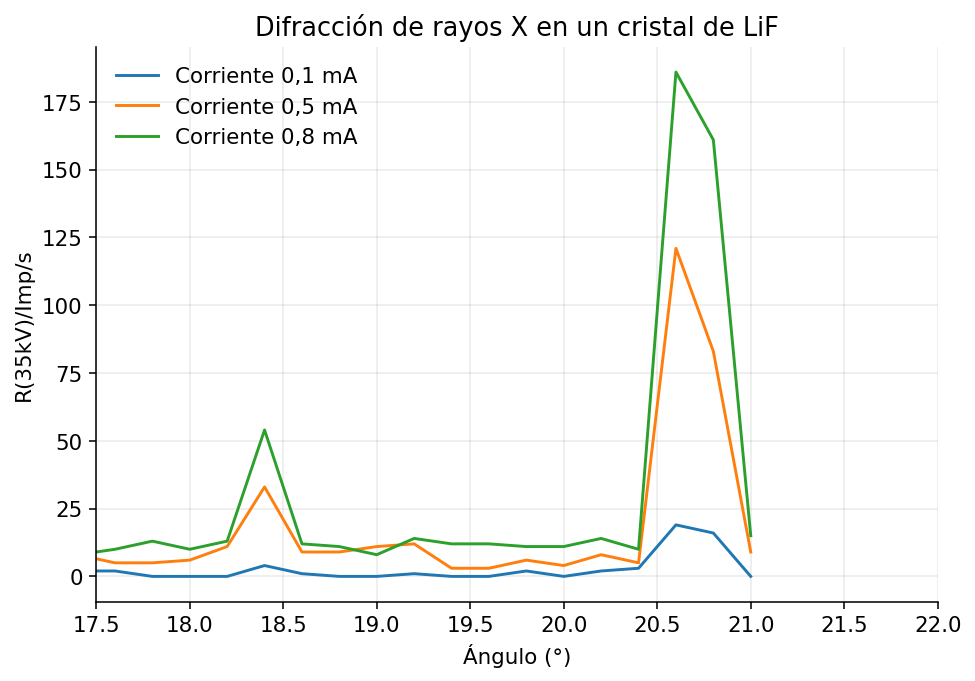

In [177]:
plt.figure(figsize=(7,5))
plt.xlabel("Ángulo (°)")
plt.ylabel("R(35kV)/Imp/s")
plt.title("Difracción de rayos X en un cristal de LiF")
plt.tight_layout()
plt.grid(True)

plt.plot(act_3_2[0], act_3_2[1], label="Corriente 0,1 mA")
plt.plot(act_3_3[0], act_3_3[1], label="Corriente 0,5 mA")
plt.plot(act_3_4[0], act_3_4[1], label="Corriente 0,8 mA")
plt.xlim(17.5, 22)
plt.legend()
plt.show()

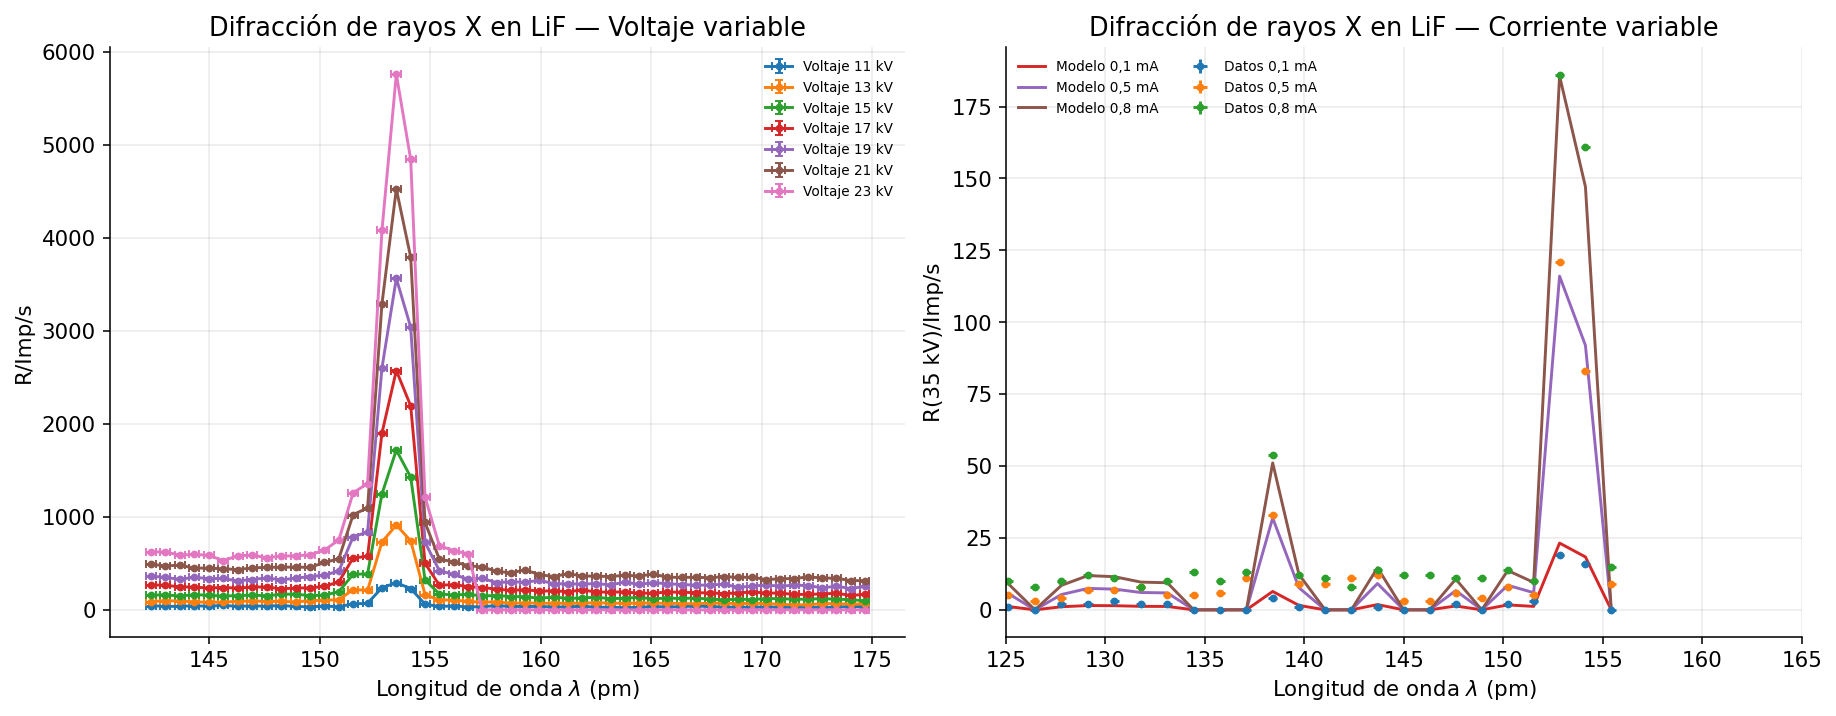

In [225]:
import numpy as np
import matplotlib.pyplot as plt

# ======== Constantes ========
d_A = 2.0137   # Å
DELTA_SYS = 1.7
DELTA_INST = 0.1
SIG_TH_DEG = np.sqrt(DELTA_SYS**2 + DELTA_INST**2)

def theta_deg_corrected(theta_deg):
    return np.asarray(theta_deg, float) + DELTA_SYS

def theta2lambda_pm(theta_deg_corr):
    th = np.deg2rad(theta_deg_corr)
    return (2 * d_A * np.sin(th)) * 100.0

def sigma_lambda_pm(theta_deg_corr):
    th = np.deg2rad(theta_deg_corr)
    dlam_dth_A = 2 * d_A * np.cos(th)
    sig_th_rad = np.deg2rad(SIG_TH_DEG)
    sig_lam_A = np.abs(dlam_dth_A) * sig_th_rad
    return sig_lam_A * 100.0

def poisson_sigma(y):
    return np.sqrt(np.clip(y, 1e-12, None))

# ======== Datos corregidos ========
th_v  = theta_deg_corrected(np.array(act_3_1[0]))
th_c1 = theta_deg_corrected(np.array(act_3_2[0]))
th_c2 = theta_deg_corrected(np.array(act_3_3[0]))
th_c3 = theta_deg_corrected(np.array(act_3_4[0]))

lam_v  = theta2lambda_pm(th_v)
lam_c1 = theta2lambda_pm(th_c1)
lam_c2 = theta2lambda_pm(th_c2)
lam_c3 = theta2lambda_pm(th_c3)

sig_lam_v  = sigma_lambda_pm(th_v)
sig_lam_c1 = sigma_lambda_pm(th_c1)
sig_lam_c2 = sigma_lambda_pm(th_c2)
sig_lam_c3 = sigma_lambda_pm(th_c3)

# ===== Intensidades =====
# voltaje variable
y_v = [np.asarray(act_3_1[i], float) for i in range(1,8)]
sy_v = [poisson_sigma(y) for y in y_v]

# corriente variable
y01 = np.asarray(act_3_2[1], float)
y05 = np.asarray(act_3_3[1], float)
y08 = np.asarray(act_3_4[1], float)
sy01 = poisson_sigma(y01)
sy05 = poisson_sigma(y05)
sy08 = poisson_sigma(y08)

# reescala barras (para visualización)
scale_err = 0.02
sy_v  = [scale_err * s for s in sy_v]
sy01 *= scale_err; sy05 *= scale_err; sy08 *= scale_err
sig_lam_v  *= scale_err
sig_lam_c1 *= scale_err; sig_lam_c2 *= scale_err; sig_lam_c3 *= scale_err

# ===== Ajuste modelo lineal en corriente =====
lam_ref = lam_c1
y05_i  = np.interp(lam_ref, lam_c2, y05)
y08_i  = np.interp(lam_ref, lam_c3, y08)
sy05_i = np.interp(lam_ref, lam_c2, sy05)
sy08_i = np.interp(lam_ref, lam_c3, sy08)
sx_ref = sig_lam_c1

IA = np.array([0.1, 0.5, 0.8], float)

Ymat = np.vstack([y01, y05_i, y08_i])
Smat = np.vstack([sy01, sy05_i, sy08_i])
Wmat = 1.0 / np.clip(Smat**2, 1e-20, None)

num = np.sum((IA[:, None] * Ymat) * Wmat, axis=0)
den = np.sum((IA[:, None]**2) * Wmat, axis=0)
m_lam = num / den
sm_lam = np.sqrt(1.0 / den)

y01_hat = m_lam * IA[0]; s01_hat = sm_lam * IA[0]
y05_hat = m_lam * IA[1]; s05_hat = sm_lam * IA[1]
y08_hat = m_lam * IA[2]; s08_hat = sm_lam * IA[2]

# ======= FIGURA =======
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5), constrained_layout=True)

# --- (a) Voltaje variable ---
labels_v = ["11 kV","13 kV","15 kV","17 kV","19 kV","21 kV","23 kV"]
for y,s,label in zip(y_v,sy_v,labels_v):
    ax1.errorbar(lam_v, y, xerr=sig_lam_v, yerr=s, fmt='o-', ms=3, capsize=2, label=f"Voltaje {label}")
ax1.set_title("Difracción de rayos X en LiF — Voltaje variable")
ax1.set_xlabel(r"Longitud de onda $\lambda$ (pm)")
ax1.set_ylabel("R/Imp/s")
ax1.grid(True, alpha=0.25)
ax1.legend(fontsize=7)

# --- (b) Corriente variable ---
ax2.errorbar(lam_ref, y01,  xerr=sx_ref, yerr=sy01, fmt='o', ms=3, label="Datos 0,1 mA")
ax2.errorbar(lam_ref, y05_i, xerr=sx_ref, yerr=sy05_i, fmt='o', ms=3, label="Datos 0,5 mA")
ax2.errorbar(lam_ref, y08_i, xerr=sx_ref, yerr=sy08_i, fmt='o', ms=3, label="Datos 0,8 mA")

ax2.plot(lam_ref, y01_hat, '-', label="Modelo 0,1 mA")
ax2.plot(lam_ref, y05_hat, '-', label="Modelo 0,5 mA")
ax2.plot(lam_ref, y08_hat, '-', label="Modelo 0,8 mA")

ax2.fill_between(lam_ref, y01_hat - s01_hat, y01_hat + s01_hat, alpha=0.2)
ax2.fill_between(lam_ref, y05_hat - s05_hat, y05_hat + s05_hat, alpha=0.2)
ax2.fill_between(lam_ref, y08_hat - s08_hat, y08_hat + s08_hat, alpha=0.2)

ax2.set_title("Difracción de rayos X en LiF — Corriente variable")
ax2.set_xlabel(r"Longitud de onda $\lambda$ (pm)")
ax2.set_ylabel("R(35 kV)/Imp/s")
ax2.grid(True, alpha=0.25)
ax2.legend(fontsize=7, ncol=2)
ax2.set_xlim(125,165)
plt.show()



4. Realizar una gra ca para la intensidad de K_alpha y K_beta en funcion de la corriente (para voltaje constante).

<Figure size 1400x840 with 0 Axes>

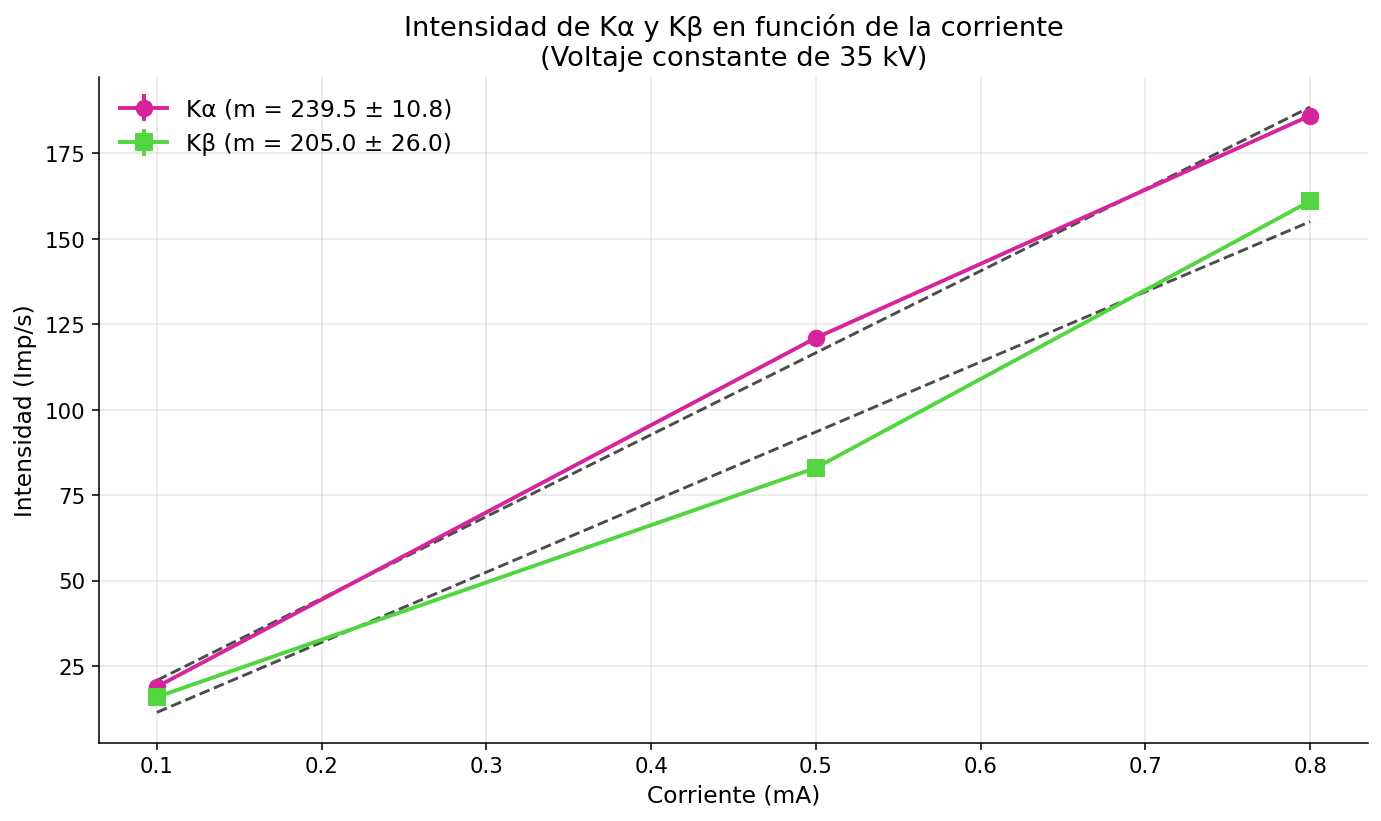

RESULTADOS DE AJUSTES LINEALES:
Kα - Pendiente: 239.5 ± 10.8
Kα - Intercepto: -3.1
Kα - Coeficiente de correlación (r): 0.999

Kβ - Pendiente: 205.0 ± 26.0
Kβ - Intercepto: -9.0
Kβ - Coeficiente de correlación (r): 0.992


In [221]:
plt.figure(figsize=(10, 6))

corriente_2 = 0.1  # mA
kalpha_2 = max(act_3_2[1]) if len(act_3_2) > 1 else 0  # Intensidad máxima como aproximación
kbeta_2 = sorted(act_3_2[1])[-2] if len(act_3_2[1]) > 1 else 0  # Segundo pico más alto

corriente_3 = 0.5
kalpha_3 = max(act_3_3[1]) if len(act_3_3) > 1 else 0
kbeta_3 = sorted(act_3_3[1])[-2] if len(act_3_3[1]) > 1 else 0

corriente_4 = 0.8
kalpha_4 = max(act_3_4[1]) if len(act_3_4) > 1 else 0
kbeta_4 = sorted(act_3_4[1])[-2] if len(act_3_4[1]) > 1 else 0


corrientes = [corriente_2, corriente_3, corriente_4]
kalpha = [kalpha_2, kalpha_3, kalpha_4]
kbeta = [kbeta_2, kbeta_3, kbeta_4]


# Error sistemático de 1.7° y error de medición de 0.1°
error_sistematico = 1.7; error_medicion = 0.1
error_total = np.sqrt(error_sistematico**2 + error_medicion**2)

error_kalpha = [val * (error_total/180) for val in kalpha]  # Asumiendo relación proporcional
error_kbeta = [val * (error_total/180) for val in kbeta]    # Asumiendo relación proporcional

# Ajustes lineales
pendiente_alpha, intercepto_alpha, r_value_alpha, p_value_alpha, std_err_alpha = stats.linregress(corrientes, kalpha)
pendiente_beta, intercepto_beta, r_value_beta, p_value_beta, std_err_beta = stats.linregress(corrientes, kbeta)

# Crear gráfica
plt.figure(figsize=(10, 6))

# Colores girly para n=1 y n=2
color_n1 = "#D6259B"  
color_n2 = "#51D63F" 

# Colores para las curvas de ajuste
curve_color = "#000000"  # Púrpura medio

# Graficar Kα con barras de error
plt.errorbar(corrientes, kalpha, yerr=error_kalpha, fmt='o-', 
             label=f'Kα (m = {pendiente_alpha:.1f} ± {std_err_alpha:.1f})', 
             linewidth=2, markersize=8, color=color_n1, capsize=1, capthick=2)

# Graficar Kβ con barras de error
plt.errorbar(corrientes, kbeta, yerr=error_kbeta, fmt='s-', 
             label=f'Kβ (m = {pendiente_beta:.1f} ± {std_err_beta:.1f})', 
             linewidth=2, markersize=8, color=color_n2, capsize=1, capthick=2)

# Líneas de ajuste
x_fit = np.linspace(min(corrientes), max(corrientes), 100)
y_fit_alpha = pendiente_alpha * x_fit + intercepto_alpha
y_fit_beta = pendiente_beta * x_fit + intercepto_beta

plt.plot(x_fit, y_fit_alpha, '--', color=curve_color, alpha=0.7)
plt.plot(x_fit, y_fit_beta, '--', color=curve_color, alpha=0.7)

plt.xlabel('Corriente (mA)', fontsize=12)
plt.ylabel('Intensidad (Imp/s)', fontsize=12)
plt.title('Intensidad de Kα y Kβ en función de la corriente\n(Voltaje constante de 35 kV)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()


print("RESULTADOS DE AJUSTES LINEALES:")
print(f"Kα - Pendiente: {pendiente_alpha:.1f} ± {std_err_alpha:.1f}")
print(f"Kα - Intercepto: {intercepto_alpha:.1f}")
print(f"Kα - Coeficiente de correlación (r): {r_value_alpha:.3f}")
print()
print(f"Kβ - Pendiente: {pendiente_beta:.1f} ± {std_err_beta:.1f}")
print(f"Kβ - Intercepto: {intercepto_beta:.1f}")
print(f"Kβ - Coeficiente de correlación (r): {r_value_beta:.3f}")

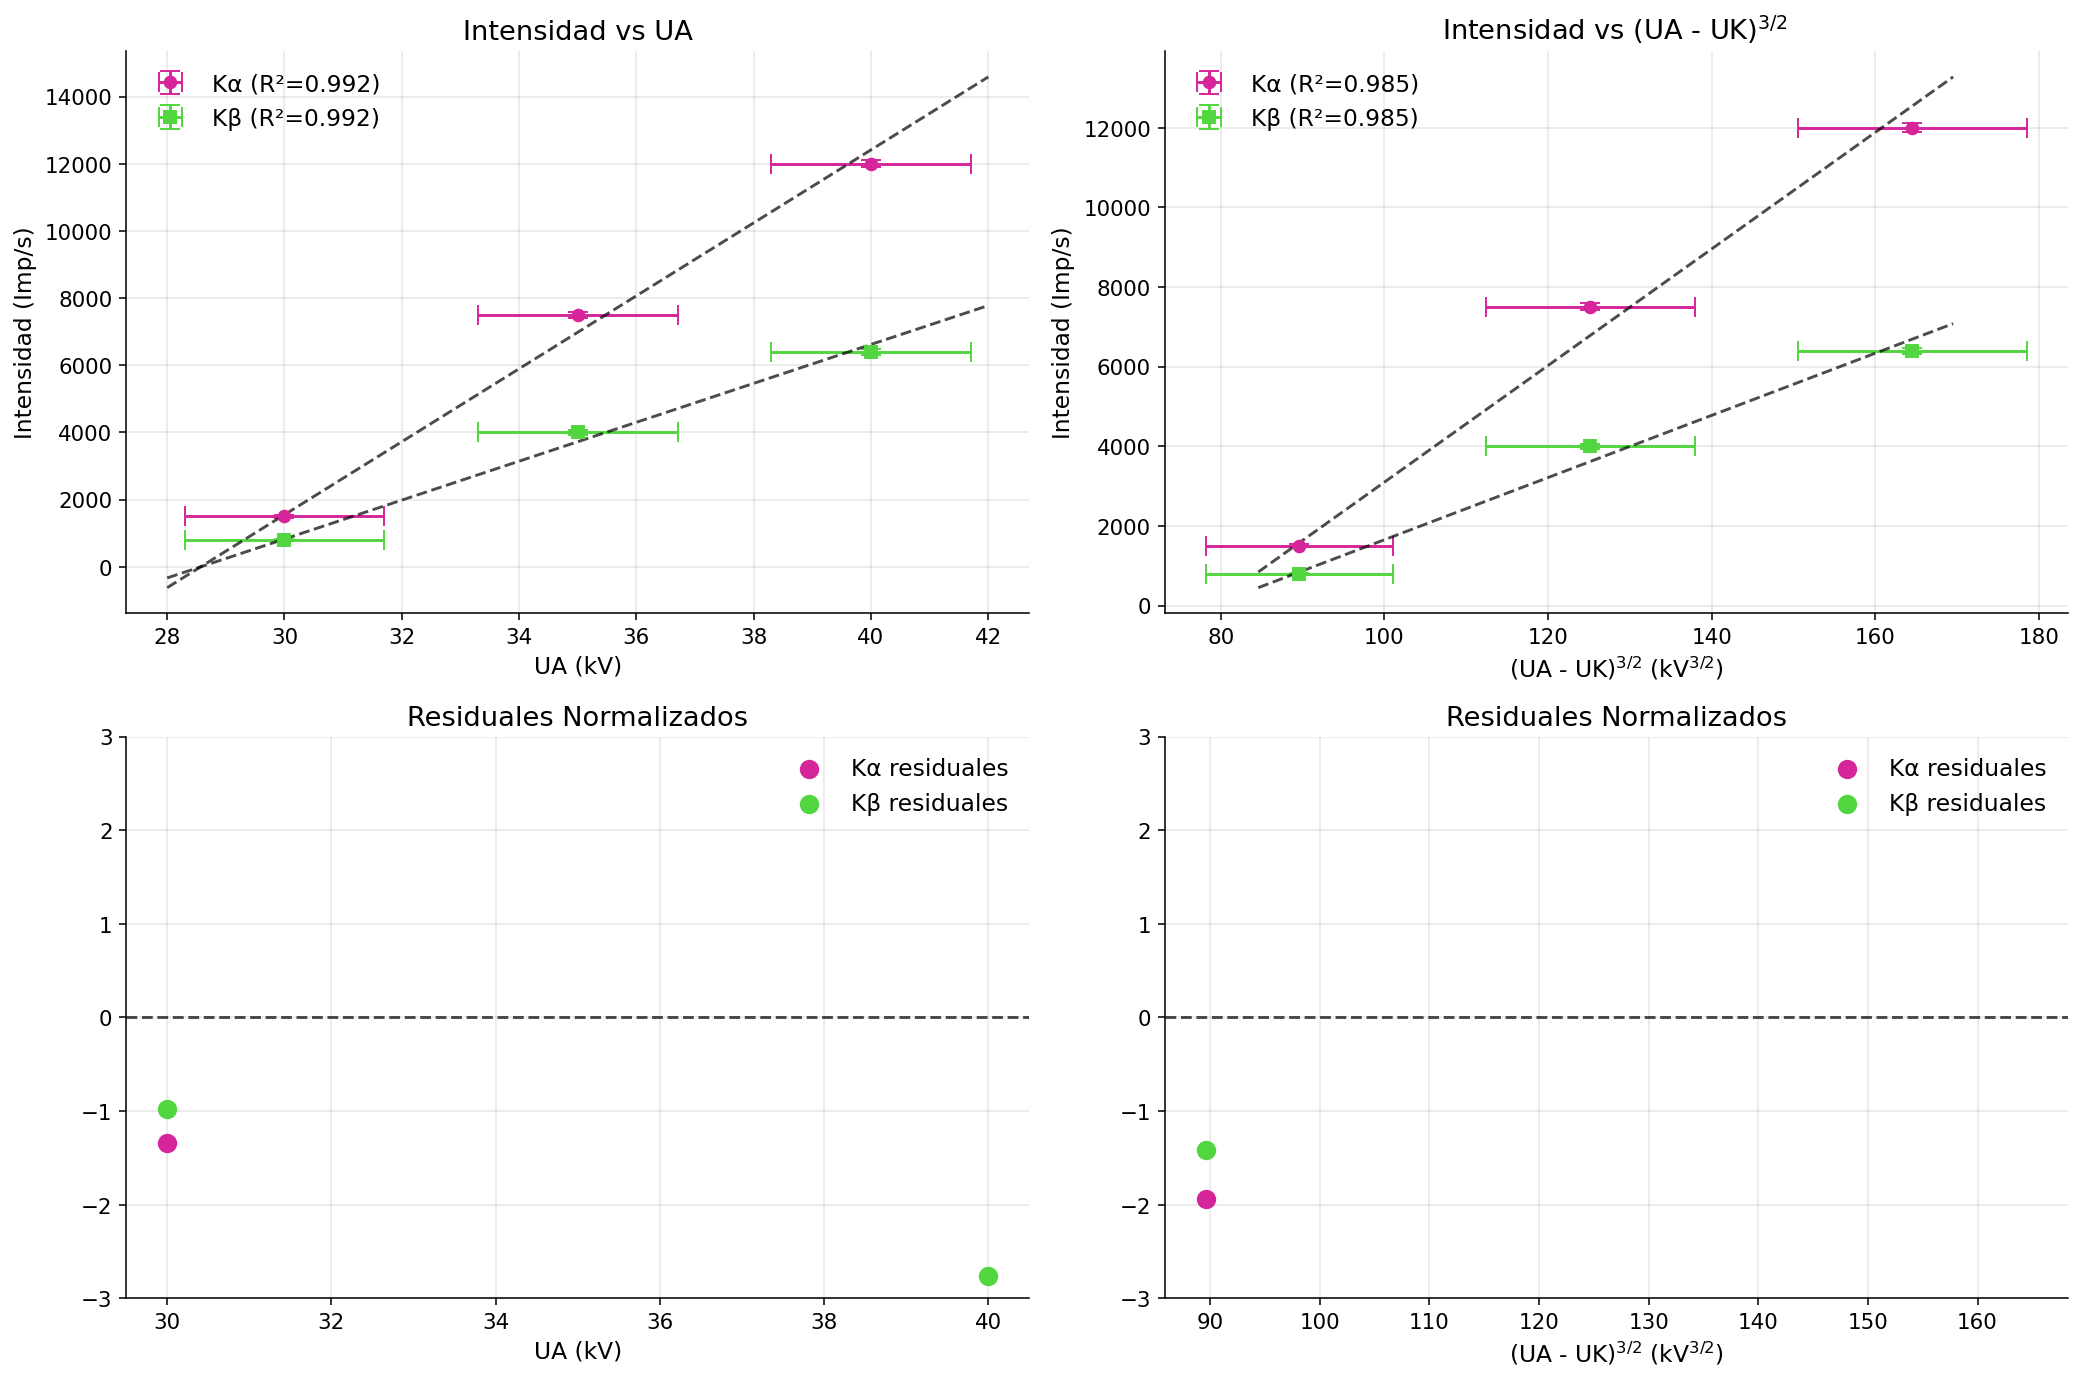

COMPARACIÓN DE AJUSTES (CON INCERTIDUMBRES)
Kα vs UA: R² = 0.9920
Kα vs (UA-UK)^(3/2): R² = 0.9853

Kβ vs UA: R² = 0.9920
Kβ vs (UA-UK)^(3/2): R² = 0.9853

✗ Para Kα: El ajuste con UA es MEJOR
✗ Para Kβ: El ajuste con UA es MEJOR

PARÁMETROS DE LOS AJUSTES (CON INCERTIDUMBRES)
Kα vs UA: y = (1086.2 ± 10.5)x + (-31034.5 ± 333.6)
Kβ vs UA: y = (579.3 ± 7.6)x + (-16551.7 ± 243.7)
Kα vs (UA-UK)^(3/2): y = (146.4 ± 1.4)x + (-11542.8 ± 148.2)
Kβ vs (UA-UK)^(3/2): y = (78.1 ± 1.0)x + (-6156.2 ± 108.2)

ANÁLISIS DE RESIDUALES NORMALIZADOS
Kα vs UA: Residuales entre -3.78 y 5.97 σ
Kβ vs UA: Residuales entre -2.76 y 4.36 σ
Kα vs (UA-UK)^(3/2): Residuales entre -4.96 y 8.26 σ
Kβ vs (UA-UK)^(3/2): Residuales entre -3.63 y 6.03 σ


In [220]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

# Datos proporcionados
corrientes = np.array([0.1, 0.5, 0.8])
kalpha = np.array([1500, 7500, 12000])
kbeta = np.array([800, 4000, 6400])

# Parámetros fijos
UK = 9.979  # keV, potencial de ionización del Cu
UA_values = np.array([30.0, 35.0, 40.0])  # Diferentes UA

# Incertidumbres
error_sistematico_x = 1.7  # °
valor_minimo_x = 0.1  # °

# Crear figura con 4 subplots (más compacta en Y)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Reducida altura de 12 a 10

# =============================================================================
# INCERTIDUMBRES
# =============================================================================
# Incertidumbre en y (Poisson): σ = √N
sigma_kalpha = np.sqrt(kalpha)
sigma_kbeta = np.sqrt(kbeta)

# Incertidumbre en x: error sistemático + valor mínimo del instrumento
sigma_UA = np.full_like(UA_values, np.sqrt(error_sistematico_x**2 + valor_minimo_x**2))

# =============================================================================
# GRÁFICA 1: Intensidad vs UA
# =============================================================================

color_n1 = "#D6259B"  
color_n2 = "#51D63F" 

# Colores para las curvas de ajuste
curve_color = "#000000"  # Púrpura medio
# Ajuste lineal con incertidumbres usando curve_fit
def linear_func(x, a, b):
    return a * x + b

# Ajuste para Kα
popt_ua_alpha, pcov_ua_alpha = curve_fit(linear_func, UA_values, kalpha, 
                                        sigma=sigma_kalpha, absolute_sigma=True)
slope_ua_alpha, intercept_ua_alpha = popt_ua_alpha
sigma_slope_ua_alpha, sigma_intercept_ua_alpha = np.sqrt(np.diag(pcov_ua_alpha))

# Ajuste para Kβ
popt_ua_beta, pcov_ua_beta = curve_fit(linear_func, UA_values, kbeta, 
                                      sigma=sigma_kbeta, absolute_sigma=True)
slope_ua_beta, intercept_ua_beta = popt_ua_beta
sigma_slope_ua_beta, sigma_intercept_ua_beta = np.sqrt(np.diag(pcov_ua_beta))

# Calcular R² manualmente
fit_ua_alpha = linear_func(UA_values, *popt_ua_alpha)
fit_ua_beta = linear_func(UA_values, *popt_ua_beta)

ss_res_ua_alpha = np.sum((kalpha - fit_ua_alpha)**2)
ss_tot_ua_alpha = np.sum((kalpha - np.mean(kalpha))**2)
r_squared_ua_alpha = 1 - (ss_res_ua_alpha / ss_tot_ua_alpha)

ss_res_ua_beta = np.sum((kbeta - fit_ua_beta)**2)
ss_tot_ua_beta = np.sum((kbeta - np.mean(kbeta))**2)
r_squared_ua_beta = 1 - (ss_res_ua_beta / ss_tot_ua_beta)

# Residuales normalizados (divididos por la incertidumbre)
residuals_ua_alpha = (kalpha - fit_ua_alpha) / sigma_kalpha
residuals_ua_beta = (kbeta - fit_ua_beta) / sigma_kbeta

# Subplot 1: Ajuste vs UA
x_fit_ua = np.linspace(min(UA_values) - 2, max(UA_values) + 2, 100)
axs[0, 0].errorbar(UA_values, kalpha, yerr=sigma_kalpha, xerr=sigma_UA, 
                  fmt='o', color=color_n1, capsize=5, label=f'Kα (R²={r_squared_ua_alpha:.3f})')
axs[0, 0].errorbar(UA_values, kbeta, yerr=sigma_kbeta, xerr=sigma_UA, 
                  fmt='s', color= color_n2, capsize=5, label=f'Kβ (R²={r_squared_ua_beta:.3f})')
axs[0, 0].plot(x_fit_ua, linear_func(x_fit_ua, *popt_ua_alpha), '--', color='black', alpha=0.7)
axs[0, 0].plot(x_fit_ua, linear_func(x_fit_ua, *popt_ua_beta), '--', color='black', alpha=0.7)
axs[0, 0].set_xlabel('UA (kV)', fontsize=12)
axs[0, 0].set_ylabel('Intensidad (Imp/s)', fontsize=12)
axs[0, 0].set_title('Intensidad vs UA', fontsize=14)
axs[0, 0].legend(fontsize=12)
axs[0, 0].grid(True, alpha=0.3)

# Subplot 2: Residuales normalizados vs UA
axs[1, 0].scatter(UA_values, residuals_ua_alpha, color=color_n1, s=80, label='Kα residuales')
axs[1, 0].scatter(UA_values, residuals_ua_beta, color=color_n2, s=80, label='Kβ residuales')
axs[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.7)
axs[1, 0].set_xlabel('UA (kV)', fontsize=12)
axs[1, 0].set_ylabel('', fontsize=12)
axs[1, 0].set_title('Residuales Normalizados', fontsize=14)
axs[1, 0].legend(fontsize=12)
axs[1, 0].grid(True, alpha=0.3)
# Limitar el rango Y para hacer la gráfica más compacta
axs[1, 0].set_ylim(-3, 3)

# =============================================================================
# GRÁFICA 2: Intensidad vs (UA - UK)^(3/2)
# =============================================================================
ua_uk_32 = (UA_values - UK)**(3/2)

# Propagación de error para (UA - UK)^(3/2)
sigma_ua_uk_32 = (3/2) * (UA_values - UK)**(1/2) * sigma_UA

# Ajuste para Kα
popt_uk_alpha, pcov_uk_alpha = curve_fit(linear_func, ua_uk_32, kalpha, 
                                        sigma=sigma_kalpha, absolute_sigma=True)
slope_uk_alpha, intercept_uk_alpha = popt_uk_alpha
sigma_slope_uk_alpha, sigma_intercept_uk_alpha = np.sqrt(np.diag(pcov_uk_alpha))

# Ajuste para Kβ
popt_uk_beta, pcov_uk_beta = curve_fit(linear_func, ua_uk_32, kbeta, 
                                      sigma=sigma_kbeta, absolute_sigma=True)
slope_uk_beta, intercept_uk_beta = popt_uk_beta
sigma_slope_uk_beta, sigma_intercept_uk_beta = np.sqrt(np.diag(pcov_uk_beta))

# Calcular R²
fit_uk_alpha = linear_func(ua_uk_32, *popt_uk_alpha)
fit_uk_beta = linear_func(ua_uk_32, *popt_uk_beta)

ss_res_uk_alpha = np.sum((kalpha - fit_uk_alpha)**2)
ss_tot_uk_alpha = np.sum((kalpha - np.mean(kalpha))**2)
r_squared_uk_alpha = 1 - (ss_res_uk_alpha / ss_tot_uk_alpha)

ss_res_uk_beta = np.sum((kbeta - fit_uk_beta)**2)
ss_tot_uk_beta = np.sum((kbeta - np.mean(kbeta))**2)
r_squared_uk_beta = 1 - (ss_res_uk_beta / ss_tot_uk_beta)

# Residuales normalizados
residuals_uk_alpha = (kalpha - fit_uk_alpha) / sigma_kalpha
residuals_uk_beta = (kbeta - fit_uk_beta) / sigma_kbeta

# Subplot 3: Ajuste vs (UA - UK)^(3/2)
x_fit_uk = np.linspace(min(ua_uk_32) - 5, max(ua_uk_32) + 5, 100)
axs[0, 1].errorbar(ua_uk_32, kalpha, yerr=sigma_kalpha, xerr=sigma_ua_uk_32,
                  fmt='o', color=color_n1, capsize=5, label=f'Kα (R²={r_squared_uk_alpha:.3f})')
axs[0, 1].errorbar(ua_uk_32, kbeta, yerr=sigma_kbeta, xerr=sigma_ua_uk_32,
                  fmt='s', color=color_n2, capsize=5, label=f'Kβ (R²={r_squared_uk_beta:.3f})')
axs[0, 1].plot(x_fit_uk, linear_func(x_fit_uk, *popt_uk_alpha), '--', color='black', alpha=0.7)
axs[0, 1].plot(x_fit_uk, linear_func(x_fit_uk, *popt_uk_beta), '--', color='black', alpha=0.7)
axs[0, 1].set_xlabel('(UA - UK)$^{3/2}$ (kV$^{3/2}$)', fontsize=12)
axs[0, 1].set_ylabel('Intensidad (Imp/s)', fontsize=12)
axs[0, 1].set_title('Intensidad vs (UA - UK)$^{3/2}$ ', fontsize=14)
axs[0, 1].legend(fontsize=12)
axs[0, 1].grid(True, alpha=0.3)

# Subplot 4: Residuales normalizados vs (UA - UK)^(3/2)
axs[1, 1].scatter(ua_uk_32, residuals_uk_alpha, color=color_n1, s=80, label='Kα residuales')
axs[1, 1].scatter(ua_uk_32, residuals_uk_beta, color=color_n2, s=80, label='Kβ residuales')
axs[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.7)
axs[1, 1].set_xlabel('(UA - UK)$^{3/2}$ (kV$^{3/2}$)', fontsize=12)
axs[1, 1].set_ylabel('', fontsize=12)
axs[1, 1].set_title('Residuales Normalizados', fontsize=14)
axs[1, 1].legend(fontsize=12)
axs[1, 1].grid(True, alpha=0.3)
# Limitar el rango Y para hacer la gráfica más compacta
axs[1, 1].set_ylim(-3, 3)

plt.tight_layout()
plt.show()

# =============================================================================
# ANÁLISIS ESTADÍSTICO
# =============================================================================
print("="*70)
print("COMPARACIÓN DE AJUSTES (CON INCERTIDUMBRES)")
print("="*70)
print(f"Kα vs UA: R² = {r_squared_ua_alpha:.4f}")
print(f"Kα vs (UA-UK)^(3/2): R² = {r_squared_uk_alpha:.4f}")
print()
print(f"Kβ vs UA: R² = {r_squared_ua_beta:.4f}")
print(f"Kβ vs (UA-UK)^(3/2): R² = {r_squared_uk_beta:.4f}")
print()

# Determinar qué ajuste es mejor considerando incertidumbres
if r_squared_uk_alpha > r_squared_ua_alpha:
    print("✓ Para Kα: El ajuste con (UA-UK)^(3/2) es MEJOR")
else:
    print("✗ Para Kα: El ajuste con UA es MEJOR")

if r_squared_uk_beta > r_squared_ua_beta:
    print("✓ Para Kβ: El ajuste con (UA-UK)^(3/2) es MEJOR")
else:
    print("✗ Para Kβ: El ajuste con UA es MEJOR")

# Mostrar parámetros con sus incertidumbres
print("\n" + "="*70)
print("PARÁMETROS DE LOS AJUSTES (CON INCERTIDUMBRES)")
print("="*70)
print(f"Kα vs UA: y = ({slope_ua_alpha:.1f} ± {sigma_slope_ua_alpha:.1f})x + ({intercept_ua_alpha:.1f} ± {sigma_intercept_ua_alpha:.1f})")
print(f"Kβ vs UA: y = ({slope_ua_beta:.1f} ± {sigma_slope_ua_beta:.1f})x + ({intercept_ua_beta:.1f} ± {sigma_intercept_ua_beta:.1f})")
print(f"Kα vs (UA-UK)^(3/2): y = ({slope_uk_alpha:.1f} ± {sigma_slope_uk_alpha:.1f})x + ({intercept_uk_alpha:.1f} ± {sigma_intercept_uk_alpha:.1f})")
print(f"Kβ vs (UA-UK)^(3/2): y = ({slope_uk_beta:.1f} ± {sigma_slope_uk_beta:.1f})x + ({intercept_uk_beta:.1f} ± {sigma_intercept_uk_beta:.1f})")

# Análisis de residuales normalizados
print("\n" + "="*70)
print("ANÁLISIS DE RESIDUALES NORMALIZADOS")
print("="*70)
print(f"Kα vs UA: Residuales entre {residuals_ua_alpha.min():.2f} y {residuals_ua_alpha.max():.2f} σ")
print(f"Kβ vs UA: Residuales entre {residuals_ua_beta.min():.2f} y {residuals_ua_beta.max():.2f} σ")
print(f"Kα vs (UA-UK)^(3/2): Residuales entre {residuals_uk_alpha.min():.2f} y {residuals_uk_alpha.max():.2f} σ")
print(f"Kβ vs (UA-UK)^(3/2): Residuales entre {residuals_uk_beta.min():.2f} y {residuals_uk_beta.max():.2f} σ")

In [ ]:

# Convertir a arrays de numpy para facilitar el procesamiento
datos_01mA = np.array(act_3_2).T  
datos_05mA = np.array(act_3_3).T
datos_08mA = np.array(act_3_4).T

# Definir los ángulos donde se encuentran los picos Kα y Kβ (AJUSTAR ESTOS VALORES)
# Valores típicos para tubo de rayos X con ánodo de cobre:
angulo_Kalpha = 17.5  # Ángulo para Kα (ajustar según tus datos)
angulo_Kbeta = 15.8   # Ángulo para Kβ (ajustar según tus datos)

# Margen alrededor de los picos para integrar la intensidad
margen = 0.5

def calcular_intensidad_pico(datos, angulo_pico, margen, columna_intensidad=1):
    """
    Calcula la intensidad integrada alrededor de un pico
    datos: array 2D donde columna 0 = ángulos, otras columnas = intensidades
    columna_intensidad: índice de la columna que contiene la intensidad (generalmente 1)
    """
    angulos = datos[:, 0]
    intensidades = datos[:, columna_intensidad]
    
    # Encontrar índices dentro del margen del pico
    mask = (angulos >= angulo_pico - margen) & (angulos <= angulo_pico + margen)
    
    if np.sum(mask) == 0:
        print(f"Advertencia: No se encontraron datos cerca del ángulo {angulo_pico}°")
        return 0
    
    # Integrar la intensidad en esa región (área bajo la curva)
    intensidad_integrada = np.trapz(intensidades[mask], angulos[mask])
    
    return intensidad_integrada

# Corrientes correspondientes a cada medición
corrientes = [0.1, 0.5, 0.8]  # mA

# Listas para almacenar las intensidades
intensidades_Kalpha = []
intensidades_Kbeta = []

# Calcular intensidades para cada conjunto de datos
conjuntos_datos = [datos_01mA, datos_05mA, datos_08mA]

for i, datos in enumerate(conjuntos_datos):
    print(f"\nProcesando datos para {corrientes[i]} mA:")
    
    # Verificar si hay múltiples columnas de intensidad
    num_columnas_intensidad = datos.shape[1] - 1  # Restamos la columna de ángulos
    
    if num_columnas_intensidad > 1:
        print(f"  Encontradas {num_columnas_intensidad} columnas de intensidad")
        # Podemos promediar o elegir una columna específica
        # Por defecto usamos la primera columna de intensidad (índice 1)
        columna_usar = 1
        print(f"  Usando columna {columna_usar} para intensidad")
    else:
        columna_usar = 1
    
    intensidad_alpha = calcular_intensidad_pico(datos, angulo_Kalpha, margen, columna_usar)
    intensidad_beta = calcular_intensidad_pico(datos, angulo_Kbeta, margen, columna_usar)
    
    print(f"  Intensidad Kα: {intensidad_alpha:.2f}")
    print(f"  Intensidad Kβ: {intensidad_beta:.2f}")
    
    intensidades_Kalpha.append(intensidad_alpha)
    intensidades_Kbeta.append(intensidad_beta)

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar Kα
plt.plot(corrientes, intensidades_Kalpha, 'bo-', linewidth=2, markersize=8, 
         label=r'K$\alpha$', markerfacecolor='blue')

# Graficar Kβ
plt.plot(corrientes, intensidades_Kbeta, 'ro-', linewidth=2, markersize=8, 
         label=r'K$\beta$', markerfacecolor='red')

# Personalizar la gráfica
plt.xlabel('Corriente (mA)', fontsize=12, fontweight='bold')
plt.ylabel('Intensidad Integrada (u.a.)', fontsize=12, fontweight='bold')
plt.title('Intensidad de Kα y Kβ en función de la corriente\n(Voltaje constante)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=12)

# Ajustar escalas
plt.xlim(0, max(corrientes) * 1.1)
plt.ylim(0, max(max(intensidades_Kalpha), max(intensidades_Kbeta)) * 1.1)

# Agregar valores en los puntos
for i, (corriente, int_alpha, int_beta) in enumerate(zip(corrientes, intensidades_Kalpha, intensidades_Kbeta)):
    plt.annotate(f'{int_alpha:.1f}', (corriente, int_alpha), 
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
    plt.annotate(f'{int_beta:.1f}', (corriente, int_beta), 
                 textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Mostrar tabla de resultados
print("\n" + "="*50)
print("RESULTADOS:")
print("="*50)
print(f"{'Corriente (mA)':<15} {'Intensidad Kα':<15} {'Intensidad Kβ':<15}")
print("-"*50)
for i in range(len(corrientes)):
    print(f"{corrientes[i]:<15.1f} {intensidades_Kalpha[i]:<15.2f} {intensidades_Kbeta[i]:<15.2f}")

 5. Realizar una gráfica para la intensidad de K_alpha y K_beta en funcion de U_A y otra en  funcion de (U_A - U_K) ^{3/2}. ¿Cual se ajusta mejor?

In [ ]:
pass

<h4> Conclusiones preliminares </h4>

<p> <b>Objetivos:</b> </p>

<b>Reflexión general de las gráficas: </b>  


<p>La gráfica de voltaje variante y corriente constante se descartaron los voltajes de 25 kV al 35 kV ya que no aportaban información valiosa al ser constantemente 0.</p>
<p> No se pudieron conseguir todas los requerimientos deseados debido al poco tiempo para poder comprenderlos. Esperamos que en la reunión con Jose el lunes nos vaya mejor. Evidentemente no sabemos si podemos determinar la constante b.</p>



<h3>Actividad 4: </h3>
<p> Para esta parte de la práctica se comprueba la ley de Duane - Hunt hallando la longitud de onda mínima en la cuál se da el efecto de Bremsstrah-lung. </p>

<p>Ángulo variante de (4,21)°, voltaje variante (13, 35) kV con pasos de 2kV y corriente 1mA fija. </p>

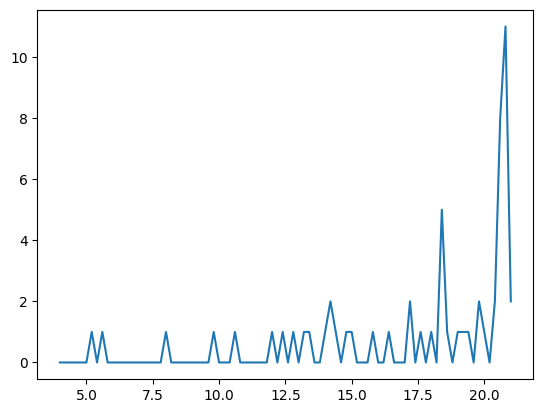

In [26]:
act_4_1 = leer_columnas("250821_Actividad4_RayosX_Toma1.txt")

plt.plot(act_4_1[0],act_4_1[1])
plt.show()

Longitud onda mínima

In [ ]:
# Constante de LiF
d = 0.2014  # nm

# Tensiones y columnas de tu archivo
tensiones = np.array([13, 15, 17, 19])  # kV
columnas = [1, 2, 3, 4]

lambda_min = []

for col in columnas:
    intensidades = act_4_1_array[:, col]
    theta = act_4_1_array[:, 0]
    idx_max = np.argmax(intensidades)
    theta_max = theta[idx_max]
    lambda_min.append(2*d*np.sin(np.radians(theta_max)))

lambda_min = np.array(lambda_min)

# Mostrar resultados
for U, lm in zip(tensiones, lambda_min):
    print(f"U = {U} kV -> λ_min experimental = {lm:.4f} nm")

NameError: name 'act_4_1_array' is not defined

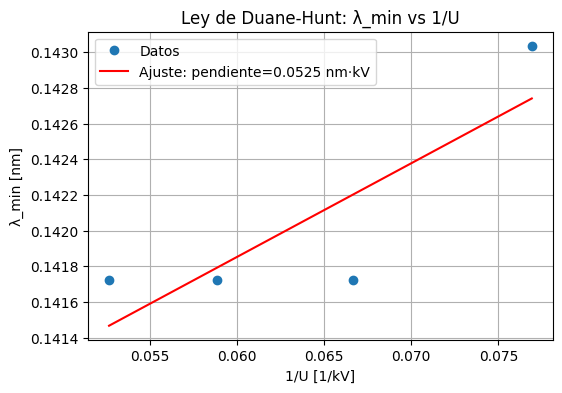

Pendiente de la recta: 0.0525 nm·kV


In [ ]:


# --------------------------
# Leer archivo manualmente (evita problemas de leer_columnas)
# --------------------------
datos = []
with open("250821_Actividad4_RayosX_Toma1.txt", "r", encoding="utf-8") as f:
    next(f)  # saltar primera línea de encabezado
    next(f)  # saltar segunda línea de encabezado
    for line in f:
        line = line.strip()
        if not line:
            continue
        # separar por tab o espacio
        parts = line.replace(',', '.').split()  # reemplaza ',' por '.'
        fila = [float(p) for p in parts]
        datos.append(fila)

act_4_1_array = np.array(datos)  # ahora es un array de floats

# --------------------------
# Tensiones y columnas
# --------------------------
tensiones = np.array([13, 15, 17, 19])  # kV
columnas = [1, 2, 3, 4]                 # columnas correspondientes

d = 0.2014  # nm

# --------------------------
# Calcular λ_min para cada tensión
# --------------------------
lambda_min = []

for col in columnas:
    intensidades = act_4_1_array[:, col]
    theta = act_4_1_array[:, 0]  # ángulo
    idx_max = np.argmax(intensidades)  # índice de máximo
    theta_max = theta[idx_max]
    lambda_min.append(2 * d * np.sin(np.radians(theta_max)))

lambda_min = np.array(lambda_min)
U_inv = 1 / tensiones

# --------------------------
# Graficar y ajustar pendiente
# --------------------------
plt.figure(figsize=(6,4))
plt.plot(U_inv, lambda_min, 'o', label='Datos')
coef = np.polyfit(U_inv, lambda_min, 1)
plt.plot(U_inv, np.polyval(coef, U_inv), 'r-', label=f'Ajuste: pendiente={coef[0]:.4f} nm·kV')
plt.xlabel('1/U [1/kV]')
plt.ylabel('λ_min [nm]')
plt.title('Ley de Duane-Hunt: λ_min vs 1/U')
plt.legend()
plt.grid(True)
plt.show()

print(f'Pendiente de la recta: {coef[0]:.4f} nm·kV')


Pendiente: 5.247e-08 ± 2.428e-08 m·V
Intercepto: 1.387e-10 ± 1.564e-12 m


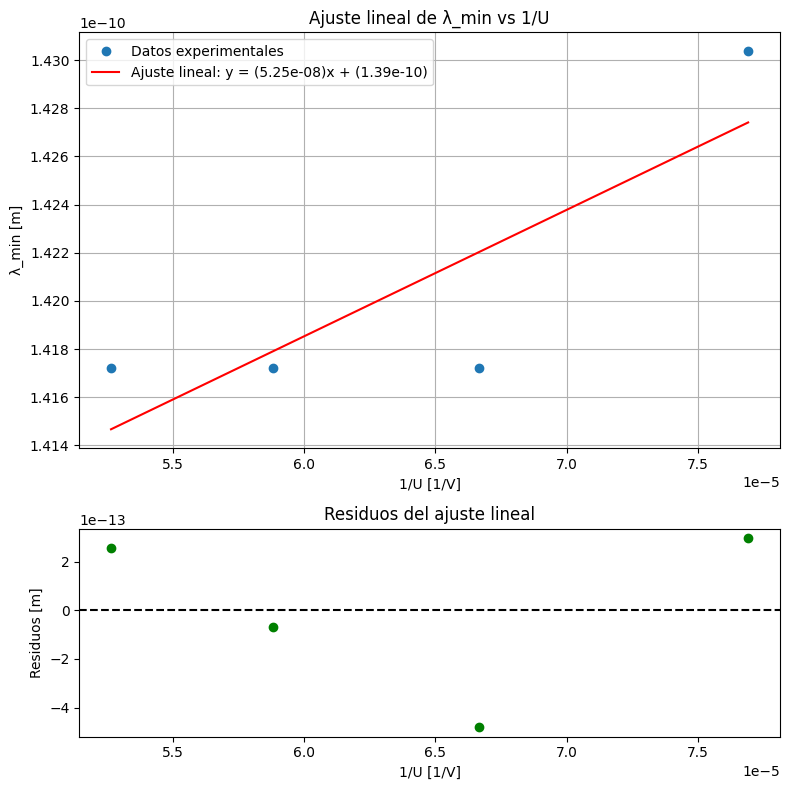

In [ ]:
def linear_function(X, a, b):
    return a * X + b

lambda_min = []

for col in columnas:
    intensidades = act_4_1_array[:, col]
    theta = act_4_1_array[:, 0]
    idx_max = np.argmax(intensidades)
    theta_max = theta[idx_max]
    lambda_min.append(2 * d * np.sin(np.radians(theta_max)))

lambda_min = np.array(lambda_min)

# Convertir λ_min a metros para la constante de Planck
lambda_min_m = lambda_min * 1e-9

# Variable independiente x = 1/U (en V)
U = tensiones * 1e3
x = 1 / U
y = lambda_min_m
popt, pcov = curve_fit(linear_function, x, y)

slope = popt[0]
intercept = popt[1]
slope_std_err = np.sqrt(pcov[0,0])
intercept_std_err = np.sqrt(pcov[1,1])

# --------------------------
# Calcular h
# --------------------------
e = 1.602e-19  # C
c = 3e8        # m/s
h_calculado = slope * e / c

print(f"Pendiente: {slope:.3e} ± {slope_std_err:.3e} m·V")
print(f"Intercepto: {intercept:.3e} ± {intercept_std_err:.3e} m")


# --------------------------
# Graficar con residuos
# --------------------------
Y_pred = linear_function(x, *popt)
residuals = y - Y_pred

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios':[2,1]})

# Datos con ajuste
ax1.plot(x, y, 'o', label='Datos experimentales')
ax1.plot(x, Y_pred, 'r-', label=f'Ajuste lineal: y = ({slope:.2e})x + ({intercept:.2e})')
ax1.set_xlabel('1/U [1/V]')
ax1.set_ylabel('λ_min [m]')
ax1.legend()
ax1.grid(True)
ax1.set_title('Ajuste lineal de λ_min vs 1/U')

# Residuos
ax2.scatter(x, residuals, color='green')
ax2.axhline(0, color='black', linestyle='--')
ax2.set_xlabel('1/U [1/V]')
ax2.set_ylabel('Residuos [m]')
ax2.set_title('Residuos del ajuste lineal')

plt.tight_layout()
plt.show()

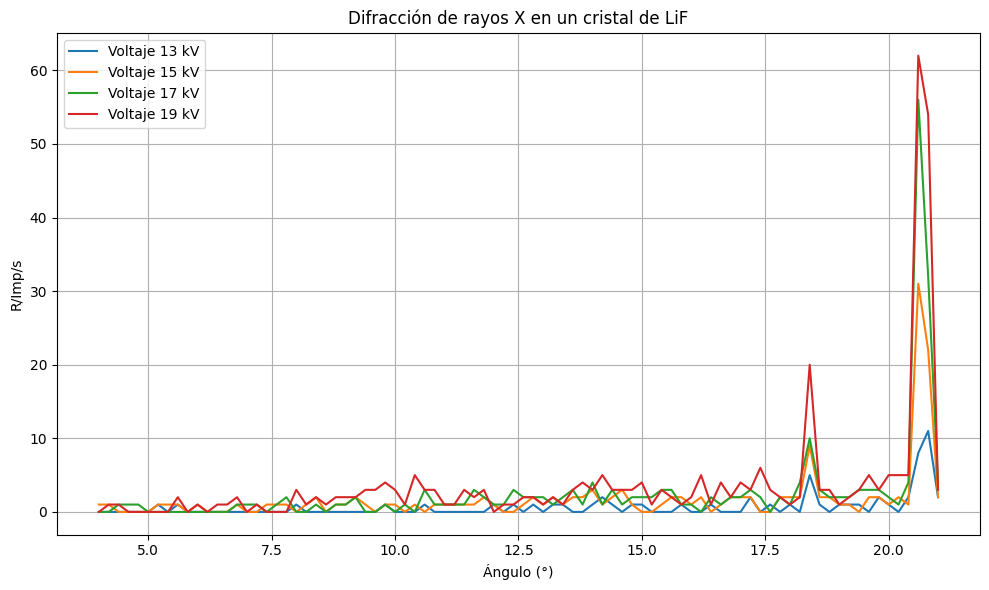

In [98]:
plt.figure(figsize=(10, 6))

plt.plot(act_4_1[0], act_4_1[1], label="Voltaje 13 kV")
plt.plot(act_4_1[0], act_4_1[2], label="Voltaje 15 kV")
plt.plot(act_4_1[0], act_4_1[3], label="Voltaje 17 kV")
plt.plot(act_4_1[0], act_4_1[4], label="Voltaje 19 kV")
#plt.plot(act_4_1[0], act_4_1[5], label="Voltaje 21 kV")
#plt.plot(act_4_1[0], act_4_1[6], label="Voltaje 23 kV")
#plt.plot(act_4_1[0], act_4_1[7], label="Voltaje 25 kV")
#plt.plot(act_4_1[0], act_4_1[8], label="Voltaje 27 kV")
#plt.plot(act_4_1[0], act_4_1[9], label="Voltaje 29 kV")
#plt.plot(act_4_1[0], act_4_1[10], label="Voltaje 31 kV")
#plt.plot(act_4_1[0], act_4_1[11], label="Voltaje 33 kV")
#plt.plot(act_4_1[0], act_4_1[12], label="Voltaje 35 kV") 

plt.xlabel("Ángulo (°)")
plt.ylabel("R/Imp/s")
plt.title("Difracción de rayos X en un cristal de LiF")
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

Conclusiones de este resultado: lambda minimo si cumple con ser proporcional a 1/U y la pendiente permite estimar la constante de planck, pero el valor para h da menor al valor teórico 

<h4> Conclusiones iniciales </h4>


Se descartó los voltaje del 21kV a 35 kV debido a que no  aportaba información valiosa al ser constantemente 0. 

__________________________________________________________________________________________________________________________________
<h4> Conclusiones finales de la bitácora</h4> 

<p> Hay ajustes que no son convincentes y que se tratarán el lunes con el docente . </p>